# МО в помощь HR отделу.

# Описание проекта
HR-аналитики компании «Работа с заботой» помогают бизнесу оптимизировать управление персоналом: бизнес предоставляет данные, а аналитики предлагают, как избежать финансовых потерь и оттока сотрудников. В этом HR-аналитикам пригодится машинное обучение, с помощью которого получится быстрее и точнее отвечать на вопросы бизнеса.
Компания предоставила данные с характеристиками сотрудников компании. Среди них — уровень удовлетворённости сотрудника работой в компании. Эту информацию получили из форм обратной связи: сотрудники заполняют тест-опросник, и по его результатам рассчитывается доля их удовлетворённости от 0 до 1, где 0 — совершенно неудовлетворён, 1 — полностью удовлетворён. <br>
У нас будет несколько задач. Первая — построить модель, которая сможет предсказать уровень удовлетворённости сотрудника на основе данных заказчика. Ваша вторая задача — построить модель, которая сможет на основе данных заказчика предсказать то, что сотрудник уволится из компании.

# План выполнения проекта.
## Задача 1: предсказание уровня удовлетворённости сотрудника:
1. Загрузка данных: ознакомление с данными.
2. Предобработка данных. Проведем необходимую предобработку данных.
3. Исследовательский анализ данных. Исследуем все признаки и сделаем выводы о том, как их нужно подготовить.
4. Корреляционный анализ. Изучим взаимосвязь признаков.
5. Подготовка данны. Подготовку признаков выполним в пайплайне.
6. Обучение моделей. Будем использовать несколько моделей. Выберем лучшую модель и проверим её качество. Выбор сделаем на основе метрики — SMAPE. Критерий успеха: SMAPE ≤15 на тестовой выборке.
7. Оформление выводов. Сделаем промежуточные выводы о том, какая модель справилась лучше и почему.
## Задача 2: предсказание увольнения сотрудника из компании:
1. Загрузка данных: ознакомление с данными. <br>
2. Предобработка данных. Проведем необходимую предобработку данных.<br>
3. Исследовательский анализ данных:<br>
1) Проведием исследовательский анализ данных.<br>
2) Составим портрет «уволившегося сотрудника». <br>
3) Аналитики утверждают, что уровень удовлетворённости сотрудника работой в компании влияет на то, уволится ли сотрудник. Проверим это утверждение: визуализируем и сравним распределения признака job_satisfaction_rate для ушедших и оставшихся сотрудников. Используем данные с обоими целевыми признаками тестовой выборки.<br>
4. Добавление нового входного признака и корреляционный анализ. Добавим job_satisfaction_rate, предсказанный лучшей моделью первой задачи, к входным признакам второй задачи. И изучем взаимосвязь признаков.<br>
5. Подготовка данных. <br>
6. Обучение модели. Обучим как минимум три модели. Как минимум для двух из них подберем гиперпараметры. Проверем качество лучшей модели. Метрика оценки качества в этой задаче — ROC-AUC. Критерий успеха: ROC-AUC ≥0.91 на тестовой выборке.<br>
7. Выводы. Сделаем промежуточные выводы о том, какая модель справилась лучше и почему.<br>
8. Общий вывод.

# Описание данных. 
id — уникальный идентификатор сотрудника;<br>
dept — отдел, в котором работает сотрудник;<br>
level — уровень занимаемой должности;<br>
workload — уровень загруженности сотрудника;<br>
employment_years — длительность работы в компании (в годах);<br>
last_year_promo — показывает, было ли повышение за последний год;<br>
last_year_violations — показывает, нарушал ли сотрудник трудовой договор за последний год;<br>
supervisor_evaluation — оценка качества работы сотрудника, которую дал руководитель;<br>
salary — ежемесячная зарплата сотрудника;<br>
job_satisfaction_rate — уровень удовлетворённости сотрудника работой в компании, целевой признак для первой задачи.<br>
quit — увольнение сотрудника из компании, целевой признак второй задачи.<br>

Установим необходимый функционал и импортируем нееобходимые библиотеки.

In [1]:
pip install --upgrade pip -q

Note: you may need to restart the kernel to use updated packages.


In [2]:
!pip install phik -q

In [3]:
!pip install scikit-learn==1.3.2 -q

In [4]:
# импортируем все необходимые библиотеки 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from sklearn.inspection import permutation_importance
import phik
import warnings
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV , GridSearchCV
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso
from sklearn.metrics import (mean_squared_error, mean_absolute_error, confusion_matrix,
                             accuracy_score, precision_score, recall_score, r2_score, roc_auc_score, make_scorer)
RANDOM_STATE = 42

# Задача 1: предсказание уровня удовлетворённости сотрудника

## 1. Загрузка данных.

Сохраним в переменную таблицус тренировочными данными.

In [5]:
train_data = pd.read_csv('/####.csv')
train_data.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
0,155278,sales,junior,medium,2,no,no,1,24000,0.58
1,653870,hr,junior,high,2,no,no,5,38400,0.76
2,184592,sales,junior,low,1,no,no,2,12000,0.11
3,171431,technology,junior,low,4,no,no,2,18000,0.37
4,693419,hr,junior,medium,1,no,no,3,22800,0.20


Взглянем на общую информацию о таблице.

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     4000 non-null   int64  
 1   dept                   3994 non-null   object 
 2   level                  3996 non-null   object 
 3   workload               4000 non-null   object 
 4   employment_years       4000 non-null   int64  
 5   last_year_promo        4000 non-null   object 
 6   last_year_violations   4000 non-null   object 
 7   supervisor_evaluation  4000 non-null   int64  
 8   salary                 4000 non-null   int64  
 9   job_satisfaction_rate  4000 non-null   float64
dtypes: float64(1), int64(4), object(5)
memory usage: 312.6+ KB


Видим, что формат данных соответствует истеному.

Сохраним таблицу с тестовыми входными признаками.

In [7]:
test_features = pd.read_csv('/####.csv')
test_features.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
0,485046,marketing,junior,medium,2,no,no,5,28800
1,686555,hr,junior,medium,1,no,no,4,30000
2,467458,sales,middle,low,5,no,no,4,19200
3,418655,sales,middle,low,6,no,no,4,19200
4,789145,hr,middle,medium,5,no,no,5,40800


Взглянем на общую информацию о таблице.

In [8]:
test_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     2000 non-null   int64 
 1   dept                   1998 non-null   object
 2   level                  1999 non-null   object
 3   workload               2000 non-null   object
 4   employment_years       2000 non-null   int64 
 5   last_year_promo        2000 non-null   object
 6   last_year_violations   2000 non-null   object
 7   supervisor_evaluation  2000 non-null   int64 
 8   salary                 2000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 140.8+ KB


Видим, что формат данных соответствует истеному.

Сохраним таблицу с тестовым целевым признаком.

In [9]:
test_target = pd.read_csv('/####.csv')
test_target.head()

,id,job_satisfaction_rate
0,130604,0.74
1,825977,0.75
2,418490,0.60
3,555320,0.72
4,826430,0.08


Взглянем на общую информацию о таблице.

In [10]:
test_target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     2000 non-null   int64  
 1   job_satisfaction_rate  2000 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 31.4 KB


Видим, что формат данных соответствует истеному.

### 1.1 Вывод по загрузке данных.
Сохранили три таблицы в переменные. Во всех таблицах формат данных соответствует истеному.

## 2. Предобработка данных.

### 2.1 Предобработка train_data.

In [11]:
train_data.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
0,155278,sales,junior,medium,2,no,no,1,24000,0.58
1,653870,hr,junior,high,2,no,no,5,38400,0.76
2,184592,sales,junior,low,1,no,no,2,12000,0.11
3,171431,technology,junior,low,4,no,no,2,18000,0.37
4,693419,hr,junior,medium,1,no,no,3,22800,0.20


Проверим уникальные значения в столбцах.

In [12]:
train_data['dept'].unique()

array(['sales', 'hr', 'technology', 'purchasing', 'marketing', nan],
      dtype=object)

In [13]:
train_data['level'].unique()

array(['junior', 'middle', 'sinior', nan], dtype=object)

In [14]:
train_data['workload'].unique()

array(['medium', 'high', 'low'], dtype=object)

In [15]:
train_data['last_year_promo'].unique()

array(['no', 'yes'], dtype=object)

In [16]:
train_data['last_year_violations'].unique()

array(['no', 'yes'], dtype=object)

In [17]:
train_data['supervisor_evaluation'].unique()

array([1, 5, 2, 3, 4])

Данные в порядке, ошибок в записях нет.

Проверим наличие пропусков и дубликатов.

In [18]:
train_data.isna().sum()

id                       0
dept                     6
level                    4
workload                 0
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
job_satisfaction_rate    0
dtype: int64

In [19]:
train_data.duplicated().sum()

0

In [20]:
train_data['id'].duplicated().sum()

0

В таблице есть 10 пропусков. Их обработкой займемся в пайплайне при моделировании. Явных дубликатов нет.

### 2.2 Предобработка test_features.

In [21]:
test_features.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
0,485046,marketing,junior,medium,2,no,no,5,28800
1,686555,hr,junior,medium,1,no,no,4,30000
2,467458,sales,middle,low,5,no,no,4,19200
3,418655,sales,middle,low,6,no,no,4,19200
4,789145,hr,middle,medium,5,no,no,5,40800


Так же проверим уникальные значения в столбцах.

In [22]:
test_features['dept'].unique()

array(['marketing', 'hr', 'sales', 'purchasing', 'technology', nan, ' '],
      dtype=object)

In [23]:
test_features['level'].unique()

array(['junior', 'middle', 'sinior', nan], dtype=object)

In [24]:
test_features['workload'].unique()

array(['medium', 'low', 'high', ' '], dtype=object)

In [25]:
test_features['last_year_promo'].unique()

array(['no', 'yes'], dtype=object)

In [26]:
test_features['last_year_violations'].unique()

array(['no', 'yes'], dtype=object)

In [27]:
test_features['supervisor_evaluation'].unique()

array([5, 4, 3, 1, 2])

Данные так же в порядке, ошибок в записях нет.

Проверим наличие пропусков и дубликатов.

In [28]:
test_features.isna().sum()

id                       0
dept                     2
level                    1
workload                 0
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
dtype: int64

In [29]:
test_features.duplicated().sum()

0

In [30]:
test_features['id'].duplicated().sum()

0

В таблице есть 3 пропуска. Как и в первой таблице, их обработкой займемся в пайплайне при моделировании. Явных дубликатов нет.

### 2.3 Предобработка test_target.

In [31]:
test_target.head()

,id,job_satisfaction_rate
0,130604,0.74
1,825977,0.75
2,418490,0.60
3,555320,0.72
4,826430,0.08


Проверим наличие пропусков и дубликатов.

In [32]:
test_target.isna().sum()

id                       0
job_satisfaction_rate    0
dtype: int64

In [33]:
test_target.duplicated().sum()

0

Пропуски и дубликаты отсутствуют. 

### 2.4 Вывод по предобработке данных.
1. В данных отсутсвуют ошибки в записях.
2. В тренировочной таблице и в таблице с входными признаками етсь пропуски. Их обработкой займемся в пайплайне при моделировании.
3. Явных дубликатов нет.

## 3. Исследовательский анализ данных

### 3.1 Анализ train_data.

In [34]:
train_data.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
0,155278,sales,junior,medium,2,no,no,1,24000,0.58
1,653870,hr,junior,high,2,no,no,5,38400,0.76
2,184592,sales,junior,low,1,no,no,2,12000,0.11
3,171431,technology,junior,low,4,no,no,2,18000,0.37
4,693419,hr,junior,medium,1,no,no,3,22800,0.20


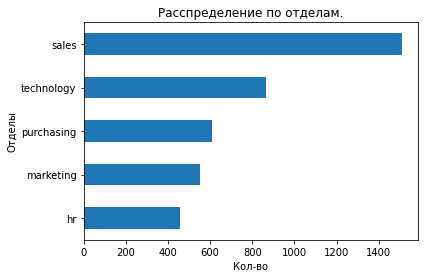

In [35]:
train_data['dept'].value_counts(ascending=True).plot.barh()
plt.title('Расспределение по отделам.')
plt.xlabel('Кол-во')
plt.ylabel('Отделы')
plt.show()

Расспределение сотрудников по отделам: первое метсо - sales, второе - technology, третье - purchasing, четвертое - marketing, пятое - hr.

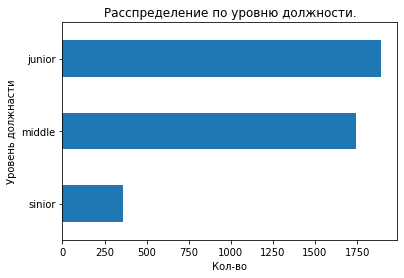

In [36]:
train_data['level'].value_counts(ascending=True).plot.barh()
plt.title('Расспределение по уровню должности.')
plt.xlabel('Кол-во')
plt.ylabel('Уровень должнасти')
plt.show()

Самый распространенный уровень должности - junior, с не большим отстованием - middlle, меньше всего сотрудников с должностью sinior.

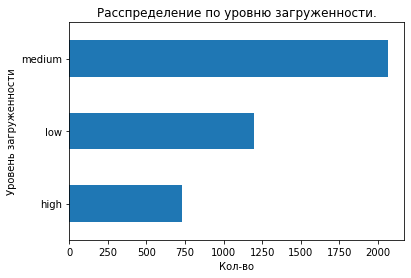

In [37]:
train_data['workload'].value_counts(ascending=True).plot.barh()
plt.title('Расспределение по уровню загруженности.')
plt.xlabel('Кол-во')
plt.ylabel('Уровень загруженности')
plt.show()

В основном, уровень загруженности сотрудников - medium, следом идет загруженность уровня low, наименее распространен уровень high.

In [38]:
train_data['employment_years'].describe()

count    4000.000000
mean        3.718500
std         2.542513
min         1.000000
25%         2.000000
50%         3.000000
75%         6.000000
max        10.000000
Name: employment_years, dtype: float64

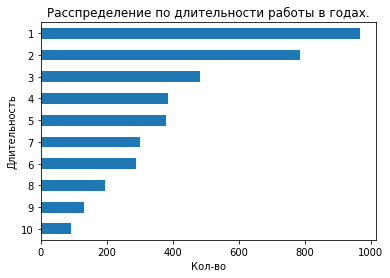

In [39]:
train_data['employment_years'].value_counts(ascending=True).plot.barh()
plt.title('Расспределение по длительности работы в годах.')
plt.xlabel('Кол-во')
plt.ylabel('Длительность')
plt.show()

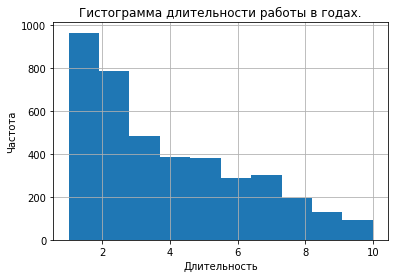

In [40]:
train_data['employment_years'].hist()
plt.title('Гистограмма длительности работы в годах.')
plt.ylabel('Частота')
plt.xlabel('Длительность')
plt.show()

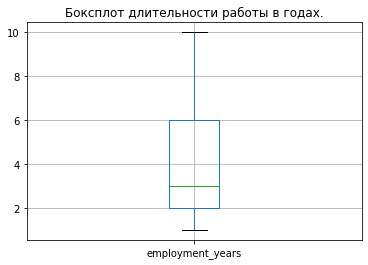

In [41]:
train_data.boxplot(column='employment_years')
plt.title('Боксплот длительности работы в годах.')
plt.show()

Большая часть сатрудников работает в компании от 2 до 6 лет. При этом, самый распространенный период работы - 1 год. 

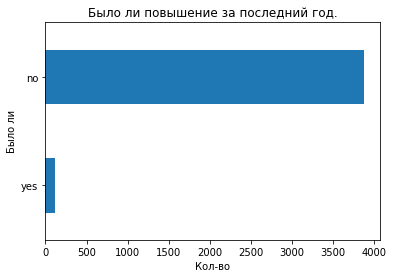

In [42]:
train_data['last_year_promo'].value_counts(ascending=True).plot.barh()
plt.title('Было ли повышение за последний год.')
plt.xlabel('Кол-во')
plt.ylabel('Было ли')
plt.show()

Только небольшая часть сотрудников получила повышение за последний год.

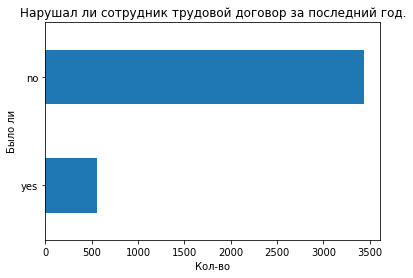

In [43]:
train_data['last_year_violations'].value_counts(ascending=True).plot.barh()
plt.title('Нарушал ли сотрудник трудовой договор за последний год.')
plt.xlabel('Кол-во')
plt.ylabel('Было ли')
plt.show()

Примерно у одной восьмой части сотрудников были нарушения трудового договора за последний год.

In [44]:
train_data['supervisor_evaluation'].describe()

count    4000.000000
mean        3.476500
std         1.008812
min         1.000000
25%         3.000000
50%         4.000000
75%         4.000000
max         5.000000
Name: supervisor_evaluation, dtype: float64

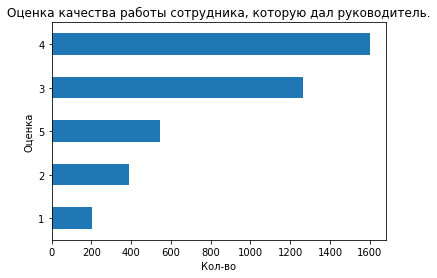

In [45]:
train_data['supervisor_evaluation'].value_counts(ascending=True).plot.barh()
plt.title('Оценка качества работы сотрудника, которую дал руководитель.')
plt.xlabel('Кол-во')
plt.ylabel('Оценка')
plt.show()

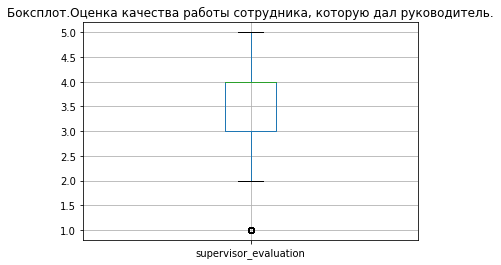

In [46]:
train_data.boxplot(column='supervisor_evaluation')
plt.title('Боксплот.Оценка качества работы сотрудника, которую дал руководитель.')
plt.show()

4 - самая расспространенная оценка качества работы сотрудника, которую дал руководитель, далее идет 3. На эти две оценки приходится примерно половина оценок. Следом идет оценка 5, потом 2, наименее распространена оценка 1. Боксплот расценивает эту оценку как выброс, на столько она редко встречается.

In [47]:
train_data['salary'].describe()

count     4000.000000
mean     33926.700000
std      14900.703838
min      12000.000000
25%      22800.000000
50%      30000.000000
75%      43200.000000
max      98400.000000
Name: salary, dtype: float64

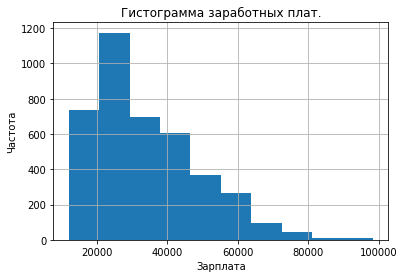

In [48]:
train_data['salary'].hist()
plt.title('Гистограмма заработных плат.')
plt.ylabel('Частота')
plt.xlabel('Зарплата')
plt.show()

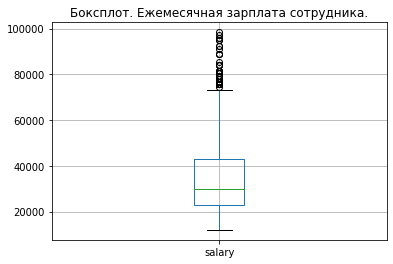

In [49]:
train_data.boxplot(column='salary')
plt.title('Боксплот. Ежемесячная зарплата сотрудника.')
plt.show()

Ежемесячная зарплата сотрудника, в основном, лежит в диапозоне от 22800 до 43200. При этом, на боксплоте мы видим выбросы в верхней части, это зарплаты топ сотрудников компании.

In [50]:
train_data['job_satisfaction_rate'].describe()

count    4000.000000
mean        0.533995
std         0.225327
min         0.030000
25%         0.360000
50%         0.560000
75%         0.710000
max         1.000000
Name: job_satisfaction_rate, dtype: float64

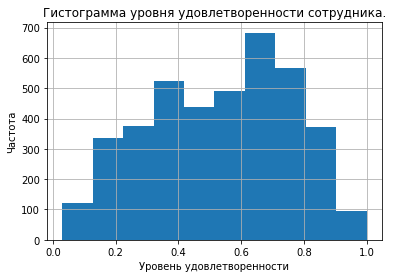

In [51]:
train_data['job_satisfaction_rate'].hist()
plt.title('Гистограмма уровня удовлетворенности сотрудника.')
plt.ylabel('Частота')
plt.xlabel('Уровень удовлетворенности')
plt.show()

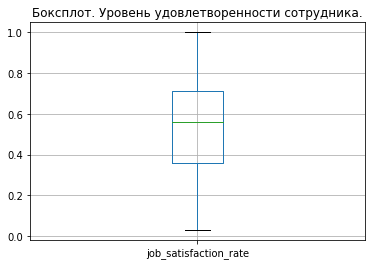

In [52]:
train_data.boxplot(column='job_satisfaction_rate')
plt.title('Боксплот. Уровень удовлетворенности сотрудника.')
plt.show()

Уровень удовлетворенности сотрудника, по большей части, лежит в диапозоне от 36% до 71%. При этом данные не имеют нормального расспределения.

### 3.2 Анализ test_features.

In [53]:
test_features.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
0,485046,marketing,junior,medium,2,no,no,5,28800
1,686555,hr,junior,medium,1,no,no,4,30000
2,467458,sales,middle,low,5,no,no,4,19200
3,418655,sales,middle,low,6,no,no,4,19200
4,789145,hr,middle,medium,5,no,no,5,40800


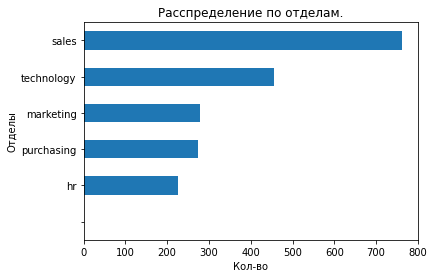

In [54]:
test_features['dept'].value_counts(ascending=True).plot.barh()
plt.title('Расспределение по отделам.')
plt.xlabel('Кол-во')
plt.ylabel('Отделы')
plt.show()

Расспределение сотрудников по отделам: первое метсо - sales, второе - technology, третье - marketing, четвертое - purchasing, пятое - hr.

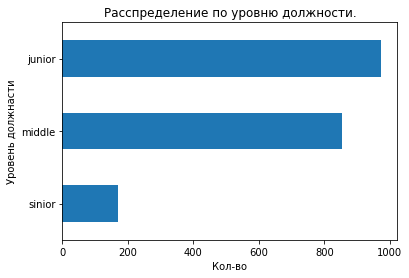

In [55]:
test_features['level'].value_counts(ascending=True).plot.barh()
plt.title('Расспределение по уровню должности.')
plt.xlabel('Кол-во')
plt.ylabel('Уровень должнасти')
plt.show()

Самый распространенный уровень должности - junior, с не большим отстованием - middlle, меньше всего сотрудников с должностью sinior.

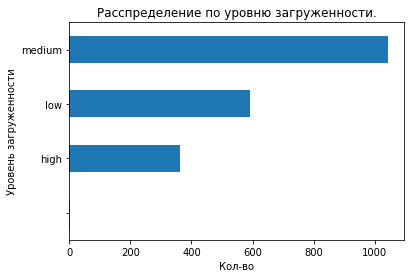

In [56]:
test_features['workload'].value_counts(ascending=True).plot.barh()
plt.title('Расспределение по уровню загруженности.')
plt.xlabel('Кол-во')
plt.ylabel('Уровень загруженности')
plt.show()

В основном, уровень загруженности сотрудников - medium, следом идет загруженность уровня low, наименее распространен уровень high.

In [57]:
test_features['employment_years'].describe()

count    2000.000000
mean        3.666500
std         2.537222
min         1.000000
25%         1.000000
50%         3.000000
75%         6.000000
max        10.000000
Name: employment_years, dtype: float64

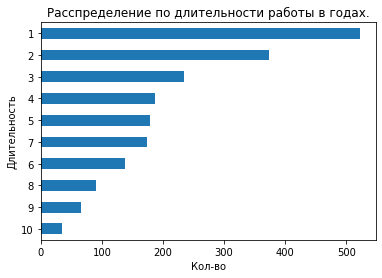

In [58]:
test_features['employment_years'].value_counts(ascending=True).plot.barh()
plt.title('Расспределение по длительности работы в годах.')
plt.xlabel('Кол-во')
plt.ylabel('Длительность')
plt.show()

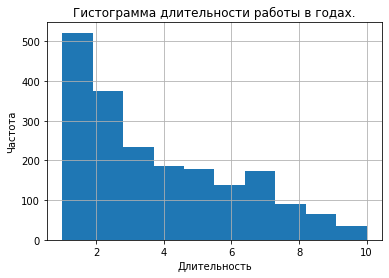

In [59]:
test_features['employment_years'].hist()
plt.title('Гистограмма длительности работы в годах.')
plt.ylabel('Частота')
plt.xlabel('Длительность')
plt.show()

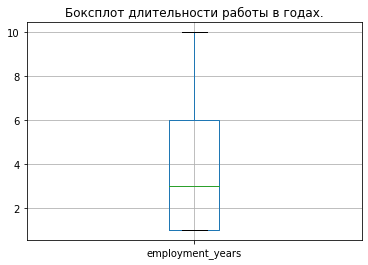

In [60]:
test_features.boxplot(column='employment_years')
plt.title('Боксплот длительности работы в годах.')
plt.show()

Большая часть сатрудников работает в компании от 2 до 6 лет. При этом, самый распространенный период работы - 1 год.

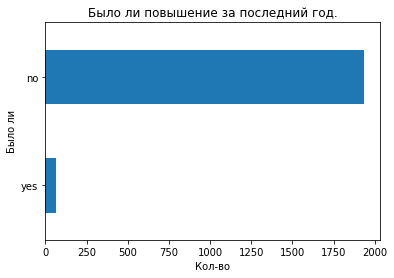

In [61]:
test_features['last_year_promo'].value_counts(ascending=True).plot.barh()
plt.title('Было ли повышение за последний год.')
plt.xlabel('Кол-во')
plt.ylabel('Было ли')
plt.show()

Только небольшая часть сотрудников получила повышение за последний год.

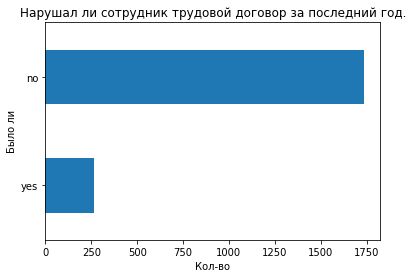

In [62]:
test_features['last_year_violations'].value_counts(ascending=True).plot.barh()
plt.title('Нарушал ли сотрудник трудовой договор за последний год.')
plt.xlabel('Кол-во')
plt.ylabel('Было ли')
plt.show()

Примерно у одной восьмой части сотрудников были нарушения трудового договора за последний год.

In [63]:
test_features['supervisor_evaluation'].describe()

count    2000.000000
mean        3.526500
std         0.996892
min         1.000000
25%         3.000000
50%         4.000000
75%         4.000000
max         5.000000
Name: supervisor_evaluation, dtype: float64

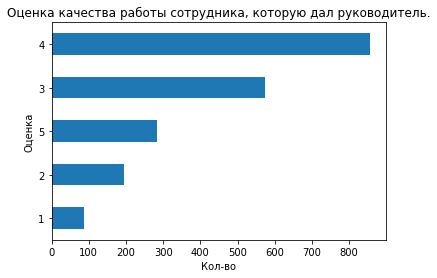

In [64]:
test_features['supervisor_evaluation'].value_counts(ascending=True).plot.barh()
plt.title('Оценка качества работы сотрудника, которую дал руководитель.')
plt.xlabel('Кол-во')
plt.ylabel('Оценка')
plt.show()

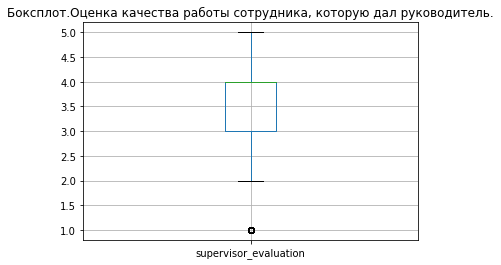

In [65]:
test_features.boxplot(column='supervisor_evaluation')
plt.title('Боксплот.Оценка качества работы сотрудника, которую дал руководитель.')
plt.show()

4 - самая расспространенная оценка качества работы сотрудника, которую дал руководитель, далее идет 3. На эти две оценки приходится примерно половина оценок. Следом идет оценка 5, потом 2, наименее распространена оценка 1. Боксплот расценивает эту оценку как выброс, на столько она редко встречается.

In [66]:
test_features['salary'].describe()

count     2000.000000
mean     34066.800000
std      15398.436729
min      12000.000000
25%      22800.000000
50%      30000.000000
75%      43200.000000
max      96000.000000
Name: salary, dtype: float64

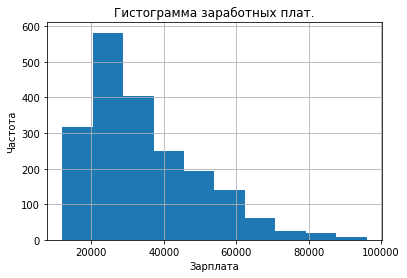

In [67]:
test_features['salary'].hist()
plt.title('Гистограмма заработных плат.')
plt.ylabel('Частота')
plt.xlabel('Зарплата')
plt.show()

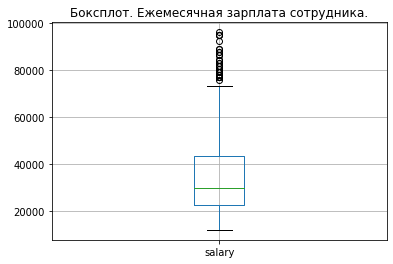

In [68]:
test_features.boxplot(column='salary')
plt.title('Боксплот. Ежемесячная зарплата сотрудника.')
plt.show()

Ежемесячная зарплата сотрудника, в основном, лежит в диапозоне от 22800 до 43200. При этом, на боксплоте мы видим выбросы в верхней части, это зарплаты топ сотрудников компании.

### 3.3 Анализ test_target.

In [69]:
test_target['job_satisfaction_rate'].describe()

count    2000.00000
mean        0.54878
std         0.22011
min         0.03000
25%         0.38000
50%         0.58000
75%         0.72000
max         1.00000
Name: job_satisfaction_rate, dtype: float64

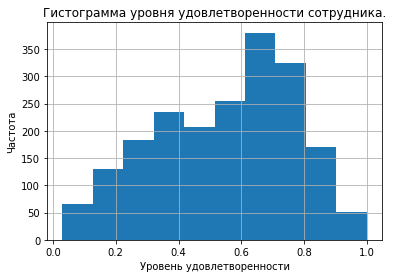

In [70]:
test_target['job_satisfaction_rate'].hist()
plt.title('Гистограмма уровня удовлетворенности сотрудника.')
plt.ylabel('Частота')
plt.xlabel('Уровень удовлетворенности')
plt.show()

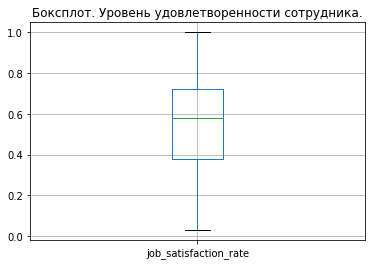

In [71]:
test_target.boxplot(column='job_satisfaction_rate')
plt.title('Боксплот. Уровень удовлетворенности сотрудника.')
plt.show()

Уровень удовлетворенности сотрудника, по большей части, лежит в диапозоне от 38% до 72%. При этом данные не имеют нормального расспределения.

### 3.4 Вывод по исседовательскому анализу.
1. Анализ train_data: <br>
1) Расспределение сотрудников по отделам: первое метсо - sales, второе - technology, третье - purchasing, четвертое - marketing, пятое - hr.<br>
2) Самый распространенный уровень должности - junior, с не большим отстованием - middlle, меньше всего сотрудников с должностью sinior.<br>
3) В основном, уровень загруженности сотрудников - medium, следом идет загруженность уровня low, наименее распространен уровень high.<br>
4) Большая часть сатрудников работает в компании от 2 до 6 лет. При этом, самый распространенный период работы - 1 год.<br>
5) Только небольшая часть сотрудников получила повышение за последний год.<br>
6) Примерно у одной восьмой части сотрудников были нарушения трудового договора за последний год.<br>
7) 4 - самая расспространенная оценка качества работы сотрудника, которую дал руководитель, далее идет 3. На эти две оценки приходится примерно половина оценок. Следом идет оценка 5, потом 2, наименее распространена оценка 1. Боксплот расценивает эту оценку как выброс, на столько она редко встречается.<br>
8) Ежемесячная зарплата сотрудника, в основном, лежит в диапозоне от 22800 до 43200. При этом, на боксплоте мы видим выбросы в верхней части, это зарплаты топ сотрудников компании.<br>
9) Уровень удовлетворенности сотрудника, по большей части, лежит в диапозоне от 36% до 71%. При этом данные не имеют нормального расспределения.<br>
2. Анализ test_features: <br>
1) Расспределение сотрудников по отделам: первое метсо - sales, второе - technology, третье - marketing, четвертое - purchasing, пятое - hr.<br>
2) Самый распространенный уровень должности - junior, с не большим отстованием - middlle, меньше всего сотрудников с должностью sinior.<br>
3) В основном, уровень загруженности сотрудников - medium, следом идет загруженность уровня low, наименее распространен уровень high.<br>
4) Большая часть сатрудников работает в компании от 2 до 6 лет. При этом, самый распространенный период работы - 1 год.<br>
5) Только небольшая часть сотрудников получила повышение за последний год.<br>
6) Примерно у одной восьмой части сотрудников были нарушения трудового договора за последний год.<br>
7) 4 - самая расспространенная оценка качества работы сотрудника, которую дал руководитель, далее идет 3. На эти две оценки приходится примерно половина оценок. Следом идет оценка 5, потом 2, наименее распространена оценка 1. Боксплот расценивает эту оценку как выброс, на столько она редко встречается.<br>
8) Ежемесячная зарплата сотрудника, в основном, лежит в диапозоне от 22800 до 43200. При этом, на боксплоте мы видим выбросы в верхней части, это зарплаты топ сотрудников компании.<br>
3. Анализ test_target: <br>
1) Уровень удовлетворенности сотрудника, по большей части, лежит в диапозоне от 38% до 72%. При этом данные не имеют нормального расспределения.<br>
4. В целом, можно сказать, что тренировочные и тестовые данные похожи.<br>

## 4. Корреляционный анализ.

Далее проведем корреляционный анализ, посмотрим на взаимосвязть признаков друг с другом и с целевым. Для этого построим матрицу корреляции phik.

In [72]:
train_data.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
0,155278,sales,junior,medium,2,no,no,1,24000,0.58
1,653870,hr,junior,high,2,no,no,5,38400,0.76
2,184592,sales,junior,low,1,no,no,2,12000,0.11
3,171431,technology,junior,low,4,no,no,2,18000,0.37
4,693419,hr,junior,medium,1,no,no,3,22800,0.20


interval columns not set, guessing: ['employment_years', 'supervisor_evaluation', 'salary', 'job_satisfaction_rate']


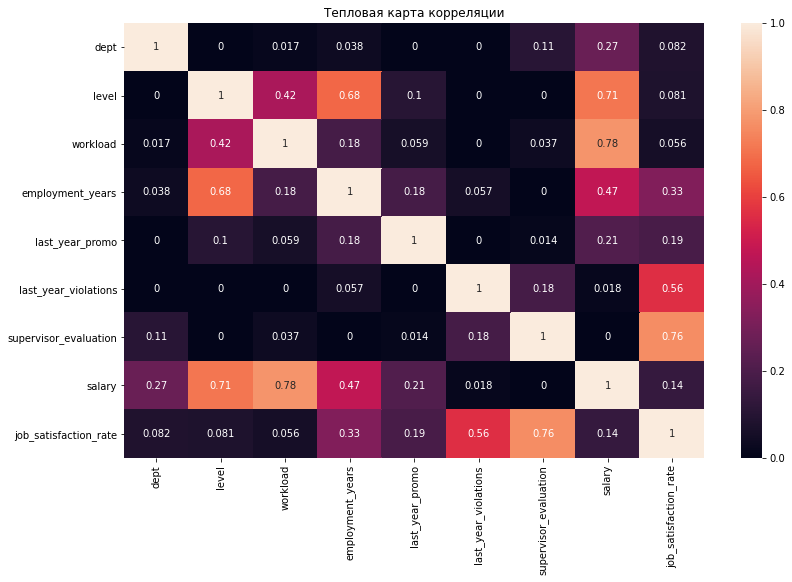

In [73]:
plt.figure(figsize=(13, 8))
sns.heatmap(train_data.drop('id',axis=1).phik_matrix(), annot=True) 
plt.title("Тепловая карта корреляции")
plt.show()

### 4.1 Вывод по корреляционному анализу.
1. Целевой признак - job_satisfaction_rate(уровень удовлетворённости сотрудника работой в компании) имеет наибольшую корреляцию с supervisor_evaluation(оценока работы сотрудника от менеджера) - 0.76. Это можно объяснить тем, что взаимоотношения между менеджером и сотрудником являются важным аспетком работы. Если менеджер высоко оценивает рабочие способности сотрудника, скорее всего, работник хорошо выполняет свои рабочие обязонности и благодаря этому имеет большее кол-во позитивного взаимодействия с менеджером, и наоборот, если работник плохо справляется со своими обязанностями, вряд ли он будет получать большое удовольствие от работы.
2. Так же достаточно выраженная связь у целевого признака с last_year_violations(нарушение трудового договра). К сажелению, нам не предоставили подробнй информации об этом признаке, сложно сказать какие именно штрафные санкции накладываются на сотрудника, нарушевшего трудовой договор. Но отталкиваясь от того, что корреляция достаточно высока, можно сказать о значимости наличия или отсутвия нарушений на уровень удовлетворенности.
3. Отметим высокую корреляцию между уровнем зароботной платы с загруженностью и уровнем должности сотрудника. Это выглядит вполне логично, сотрудник занимающий более высокую должность и работающий более усердно получует полее высокую оплату труда. 
4. При этом этом корреляция между зарплатой и продолжительностью работы в компании составляет 0.47. Также зависимость между уровнем должности и продолжительностью работы - 0.68. Это говорит о возможности быстрого роста в компании, хотя это происходит не так часто.

## 5. Подготовка данных.

Для дальнейшей работы нам нужно объединить тестовые таблицы в одну.

In [74]:
test_data = test_features.merge(test_target, on='id')
test_data.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
0,485046,marketing,junior,medium,2,no,no,5,28800,0.79
1,686555,hr,junior,medium,1,no,no,4,30000,0.72
2,467458,sales,middle,low,5,no,no,4,19200,0.64
3,418655,sales,middle,low,6,no,no,4,19200,0.60
4,789145,hr,middle,medium,5,no,no,5,40800,0.75


In [75]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     2000 non-null   int64  
 1   dept                   1998 non-null   object 
 2   level                  1999 non-null   object 
 3   workload               2000 non-null   object 
 4   employment_years       2000 non-null   int64  
 5   last_year_promo        2000 non-null   object 
 6   last_year_violations   2000 non-null   object 
 7   supervisor_evaluation  2000 non-null   int64  
 8   salary                 2000 non-null   int64  
 9   job_satisfaction_rate  2000 non-null   float64
dtypes: float64(1), int64(4), object(5)
memory usage: 171.9+ KB


In [76]:
test_data.isna().sum()

id                       0
dept                     2
level                    1
workload                 0
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
job_satisfaction_rate    0
dtype: int64

In [77]:
test_data.duplicated().sum()

0

После объединения проверили наличие пропусков, дубликатов, формат данных и размер таблицы. Все в порядке.

Далее создадим переменные с категориальными и числовыми столбцами. Так же переменные с целевыми и входными признаками для тренровочных и тестовых данных.

In [78]:
X_train = train_data.drop(['id','job_satisfaction_rate'],axis=1)
y_train = train_data['job_satisfaction_rate']
X_test = test_data.drop(['id','job_satisfaction_rate'],axis=1)
y_test = test_data['job_satisfaction_rate']

ohe_columns = ['dept','last_year_promo','last_year_violations']
ord_columns = ['level','workload']
num_columns = ['employment_years','salary']

Создадим пайплайн, включающий в себя этапы предобработки, кодирования и модель.

In [79]:
# создаём пайплайн для подготовки признаков из списка ohe_columns: заполнение пропусков и OHE-кодирование
# SimpleImputer + OHE
ohe_pipe = Pipeline(
    [('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False))
    ]
    )

# создаём пайплайн для подготовки признаков из списка ord_columns: заполнение пропусков и Ordinal-кодирование
# SimpleImputer + OE
ord_pipe = Pipeline(
    [('simpleImputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ord',  OrdinalEncoder(
                categories=[
                    ['junior', 'middle', 'sinior'],
                    ['low', 'medium', 'high'],
                ], 
                handle_unknown='use_encoded_value', unknown_value= -1
            )
        ),
     ('simpleImputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
    ]
)

# создаём общий пайплайн для подготовки данных
data_preprocessor = ColumnTransformer(
    [('ohe', ohe_pipe, ohe_columns),
     ('ord', ord_pipe, ord_columns),
     ('num', MinMaxScaler(), num_columns)
    ], 
    remainder='passthrough'
)

In [80]:
# создаём итоговый пайплайн: подготовка данных и модель
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', DecisionTreeRegressor(random_state=RANDOM_STATE))
])

Создадим словарь с моделями и параметрами к ним.

In [81]:
param_grid = [
    # словарь для модели DecisionTreeRegressor()
    {
        'models': [DecisionTreeRegressor(random_state=RANDOM_STATE)],
        'models__max_depth': range(2,5),
        'models__max_features': range(2,5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    
    # словарь для модели RandomForestRegressor()
    {
        'models': [RandomForestRegressor(random_state=RANDOM_STATE)],
        'preprocessor__num': ['passthrough'],
        'models__n_estimators': range(50, 401, 50),
        'models__max_depth': range(8,21,3)
    },
    
   
    # словарь для модели LinearRegression()
    {
        'models': [LinearRegression()],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    
    # словарь для модели Lasso()
    {
        'models': [Lasso(random_state=RANDOM_STATE)],
        'models__alpha': range(0,10),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  

    },
    
    
    # словарь для модели Ridge()
    {
        'models': [Ridge(random_state=RANDOM_STATE)],
        'models__alpha': range(0,10),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  

    }

]

### 5.1 Вывод по подготовке данных.
1. Тестовые таблицы были объединены в одну.
2. Создадали переменные с категориальными и числовыми столбцами. Так же переменные с целевыми и входными признаками для тренровочных и тестовых данных.
3. Создали пайплайн, включающий в себя этапы предобработки, кодирования и модель, и словарь с моделями и параметрами к ним.

## 6. Обучение моделей.

Создадим функцию для подсчета SMAPE.

In [82]:
def smape(y_true, y_pred):
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2.0
    diff = np.abs(y_true - y_pred) / denominator
    diff[denominator == 0] = 0.0
    return np.mean(diff) * 100


In [83]:
scorer = make_scorer(smape, greater_is_better = False)

Произведем рандомный поиск лучшей модели и ее параметров, т.к. кол-во возможных комбинаций велико. 

In [84]:
randomized_search = RandomizedSearchCV(
    pipe_final,
    param_grid,
    cv=5,
    n_jobs=-1,
    scoring=scorer,
    random_state=RANDOM_STATE
)

In [85]:
# обучение рандомного поиска
randomized_search.fit(X_train, y_train)

# вывод лучшей модели, ее параметров и метрик на тренировочной и тестовой выборках
print('Лучшая модель и её параметры:\n\n', randomized_search.best_estimator_)
print ('Метрика SMAPE лучшей модели на тренировочной выборке:', randomized_search.best_score_*-1)
y_test_pred = randomized_search.predict(X_test)
print(f'Метрика SMAPE на тестовой выборке: {smape(y_test, y_test_pred)}')

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['dept', 'last_year_promo',
                                                   'last_year_violations']),
                                                 ('ord',
                            

/opt/conda/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Выведем резулбтаты работы всех моделей.

In [86]:
result = pd.DataFrame(randomized_search.cv_results_)
display(result[
    ['rank_test_score', 'param_models', 'mean_test_score','params']
].sort_values('rank_test_score'))

,rank_test_score,param_models,mean_test_score,params
0,1,RandomForestRegressor(random_state=42),-13.208812,"{'preprocessor__num': 'passthrough', 'models__..."
5,2,RandomForestRegressor(random_state=42),-13.211899,"{'preprocessor__num': 'passthrough', 'models__..."
1,3,RandomForestRegressor(random_state=42),-13.709179,"{'preprocessor__num': 'passthrough', 'models__..."
3,4,RandomForestRegressor(random_state=42),-15.688119,"{'preprocessor__num': 'passthrough', 'models__..."
4,5,Ridge(random_state=42),-25.016375,"{'preprocessor__num': StandardScaler(), 'model..."
7,6,Ridge(random_state=42),-25.023082,"{'preprocessor__num': 'passthrough', 'models__..."
6,7,LinearRegression(),-25.028455,"{'preprocessor__num': 'passthrough', 'models':..."
9,8,DecisionTreeRegressor(random_state=42),-29.071076,"{'preprocessor__num': 'passthrough', 'models__..."
2,9,DecisionTreeRegressor(random_state=42),-29.761921,"{'preprocessor__num': MinMaxScaler(), 'models_..."
8,10,Lasso(random_state=42),-39.804936,"{'preprocessor__num': 'passthrough', 'models__..."


Первые четыре места занимает модель RandomForestRegressor. 

In [87]:
# сохраним лучшую модель
best_model = randomized_search.best_estimator_

### 6.1 Вывод по обучению модели.
1. RandomForestRegressor с параметрами max_depth=17, n_estimators=300 стала лучшей моделью. Метрика SMAPE на тренировочной выборке: 13.207289613825335 ,метрика SMAPE на тестовой выборке: 12.369961277125316. Критерий успеха: SMAPE ≤15 на тестовой выборке. 
2. Преимущества : <br>
1) Использование ансамбля деревьев: RandomForestRegressor является ансамблем деревьев решений. Он объединяет несколько деревьев, каждое из которых обучается на подмножестве данных и использует случайное подмножество признаков для каждого дерева. Это позволяет уменьшить переобучение и повысить обобщающую способность модели.<br>
2) Устойчивость к переобучению: Благодаря случайному выбору подмножества данных и признаков для каждого дерева, RandomForest обычно более устойчив к переобучению по сравнению с одним деревом решений.<br>
3) Обработка большого объема данных: RandomForest хорошо справляется с обработкой больших объемов данных и может эффективно работать с множеством признаков.<br>
4) Не чувствителен к масштабированию признаков: Деревья решений, в том числе и в составе RandomForest, не чувствительны к масштабированию признаков. Это может быть выгодно, если есть признаки с различными диапазонами значений.<br>
5) Способность к обработке нелинейных зависимостей: RandomForest может лучше справляться с моделированием сложных нелинейных зависимостей в данных, чем линейные модели.<br>

# Задача 2: предсказание увольнения сотрудника из компании.

## 1. Загрузка данных

Сохраним в переменную таблицус тренировочными данными.

In [88]:
train_quit = pd.read_csv('/####.csv')
train_quit.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
0,723290,sales,middle,high,2,no,no,4,54000,no
1,814010,sales,junior,medium,2,no,no,4,27600,no
2,155091,purchasing,middle,medium,5,no,no,1,37200,no
3,257132,sales,junior,medium,2,no,yes,3,24000,yes
4,910140,marketing,junior,medium,2,no,no,5,25200,no


Взглянем на общую информацию о таблице.

In [89]:
train_quit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     4000 non-null   int64 
 1   dept                   4000 non-null   object
 2   level                  4000 non-null   object
 3   workload               4000 non-null   object
 4   employment_years       4000 non-null   int64 
 5   last_year_promo        4000 non-null   object
 6   last_year_violations   4000 non-null   object
 7   supervisor_evaluation  4000 non-null   int64 
 8   salary                 4000 non-null   int64 
 9   quit                   4000 non-null   object
dtypes: int64(4), object(6)
memory usage: 312.6+ KB


Видим, что формат данных соответствует истеному.

Сохраним таблицу с тестовыми входными признаками.

In [90]:
quit_test_features = pd.read_csv('/####.csv')
quit_test_features.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
0,485046,marketing,junior,medium,2,no,no,5,28800
1,686555,hr,junior,medium,1,no,no,4,30000
2,467458,sales,middle,low,5,no,no,4,19200
3,418655,sales,middle,low,6,no,no,4,19200
4,789145,hr,middle,medium,5,no,no,5,40800


Взглянем на общую информацию о таблице.

In [91]:
quit_test_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     2000 non-null   int64 
 1   dept                   1998 non-null   object
 2   level                  1999 non-null   object
 3   workload               2000 non-null   object
 4   employment_years       2000 non-null   int64 
 5   last_year_promo        2000 non-null   object
 6   last_year_violations   2000 non-null   object
 7   supervisor_evaluation  2000 non-null   int64 
 8   salary                 2000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 140.8+ KB


Видим, что формат данных соответствует истеному.

Сохраним таблицу с тестовым целевым признаком.

In [92]:
quit_test_target = pd.read_csv('/####.csv')
quit_test_target.head()

,id,quit
0,999029,yes
1,372846,no
2,726767,no
3,490105,no
4,416898,yes


Взглянем на общую информацию о таблице.

In [93]:
quit_test_target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2000 non-null   int64 
 1   quit    2000 non-null   object
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


Видим, что формат данных соответствует истеному.

### 1.1 Вывод по загрузке данных.
Сохранили три таблицы в переменные. Во всех таблицах формат данных соответствует истеному.

## 2. Предобработка данных.

### 2.1 Предобработка train_quit.

In [94]:
train_quit.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
0,723290,sales,middle,high,2,no,no,4,54000,no
1,814010,sales,junior,medium,2,no,no,4,27600,no
2,155091,purchasing,middle,medium,5,no,no,1,37200,no
3,257132,sales,junior,medium,2,no,yes,3,24000,yes
4,910140,marketing,junior,medium,2,no,no,5,25200,no


Проверим уникальные значения в столбцах.

In [95]:
train_quit['dept'].unique()

array(['sales', 'purchasing', 'marketing', 'technology', 'hr'],
      dtype=object)

In [96]:
train_quit['level'].unique()

array(['middle', 'junior', 'sinior'], dtype=object)

In [97]:
train_quit['workload'].unique()

array(['high', 'medium', 'low'], dtype=object)

In [98]:
train_quit['last_year_promo'].unique()

array(['no', 'yes'], dtype=object)

In [99]:
train_quit['last_year_violations'].unique()

array(['no', 'yes'], dtype=object)

In [100]:
train_quit['supervisor_evaluation'].unique()

array([4, 1, 3, 5, 2])

Данные в порядке, ошибок в записях нет.

Проверим наличие пропусков и дубликатов.

In [101]:
train_quit.isna().sum()

id                       0
dept                     0
level                    0
workload                 0
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
quit                     0
dtype: int64

In [102]:
train_quit.duplicated().sum()

0

In [103]:
train_quit['id'].duplicated().sum()

0

In [104]:
train_quit.drop(['id','quit'], axis=1).duplicated().sum()

1545

In [105]:
train_quit[train_quit.duplicated(subset=['dept','level','workload',
                                         'employment_years','last_year_promo',
                                         'last_year_violations','supervisor_evaluation','salary'])== True]

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
65,781190,marketing,junior,medium,1,no,no,4,24000,yes
68,282979,sales,middle,low,5,no,no,4,24000,yes
117,873412,technology,junior,medium,2,no,no,4,31200,no
144,847141,sales,middle,low,5,no,no,4,19200,no
152,749683,sales,middle,low,8,no,no,4,19200,no
...,...,...,...,...,...,...,...,...,...,...
3991,778735,technology,junior,low,2,no,no,4,22800,yes
3993,387733,marketing,middle,medium,5,no,no,3,44400,no
3995,588809,sales,junior,medium,4,no,no,3,26400,no
3996,672059,sales,middle,high,9,no,no,4,52800,no


In [106]:
train_quit = train_quit.drop_duplicates(subset=['dept','level','workload',
                                         'employment_years','last_year_promo',
                                         'last_year_violations','supervisor_evaluation','salary'])
train_quit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2455 entries, 0 to 3998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     2455 non-null   int64 
 1   dept                   2455 non-null   object
 2   level                  2455 non-null   object
 3   workload               2455 non-null   object
 4   employment_years       2455 non-null   int64 
 5   last_year_promo        2455 non-null   object
 6   last_year_violations   2455 non-null   object
 7   supervisor_evaluation  2455 non-null   int64 
 8   salary                 2455 non-null   int64 
 9   quit                   2455 non-null   object
dtypes: int64(4), object(6)
memory usage: 211.0+ KB


In [107]:
train_quit.shape

(2455, 10)

In [108]:
train_quit.isna().sum()

id                       0
dept                     0
level                    0
workload                 0
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
quit                     0
dtype: int64

В таблице пропусков не было. Но обнаружили 1545 неполных дубликатов. Эти данные, хоть и не являются полными дубликатами, для модели эти данные будут вредны, т.к. имея одинаковые входные признаки, целевой признак отличается. Поэтому модели будет тяжелее выявить закономерности. 

### 2.2 Предобработка quit_test_features.

In [109]:
quit_test_features.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
0,485046,marketing,junior,medium,2,no,no,5,28800
1,686555,hr,junior,medium,1,no,no,4,30000
2,467458,sales,middle,low,5,no,no,4,19200
3,418655,sales,middle,low,6,no,no,4,19200
4,789145,hr,middle,medium,5,no,no,5,40800


Проверим уникальные значения в столбцах.

In [110]:
quit_test_features['dept'].unique()

array(['marketing', 'hr', 'sales', 'purchasing', 'technology', nan, ' '],
      dtype=object)

In [111]:
quit_test_features['level'].unique()

array(['junior', 'middle', 'sinior', nan], dtype=object)

In [112]:
quit_test_features['workload'].unique()

array(['medium', 'low', 'high', ' '], dtype=object)

In [113]:
quit_test_features['last_year_promo'].unique()

array(['no', 'yes'], dtype=object)

In [114]:
quit_test_features['last_year_violations'].unique()

array(['no', 'yes'], dtype=object)

In [115]:
quit_test_features['supervisor_evaluation'].unique()

array([5, 4, 3, 1, 2])

Данные в порядке, ошибок в записях нет.

Проверим наличие пропусков и дубликатов.

In [116]:
quit_test_features.isna().sum()

id                       0
dept                     2
level                    1
workload                 0
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
dtype: int64

In [117]:
quit_test_features.duplicated().sum()

0

In [118]:
quit_test_features['id'].duplicated().sum()

0

В таблице есть 3 пропуска. Как и в первой задаче, их обработкой займемся в пайплайне при моделировании. Явных дубликатов нет.

### 2.3 Предобработка quit_test_target.

In [119]:
quit_test_target.head()

,id,quit
0,999029,yes
1,372846,no
2,726767,no
3,490105,no
4,416898,yes


Проверим наличие пропусков и дубликатов.

In [120]:
quit_test_target['quit'].unique()

array(['yes', 'no'], dtype=object)

In [121]:
quit_test_target.isna().sum()

id      0
quit    0
dtype: int64

In [122]:
quit_test_target.duplicated().sum()

0

In [123]:
quit_test_target['id'].duplicated().sum()

0

Пропуски и дубликаты отсутствуют.

### 2.4 Вывод по предобработке данных.
1. В данных отсутсвуют ошибки в записях.
2. В тренировочной таблице и в таблице с входными признаками етсь пропуски. Их обработкой займемся в пайплайне при моделировании.
3. Явных дубликатов нет.
4. В тренировочной таблице обнаружили 1545 неполных дубликатов. Эти данные, хоть и не являются полными дубликатами, для модели они будут вредны, т.к. имея одинаковые входные признаки, целевой признак отличается. Поэтому модели будет тяжелее выявить закономерности.

## 3. Исследовательский анализ данных.

### 3.1 Анализ train_quit.

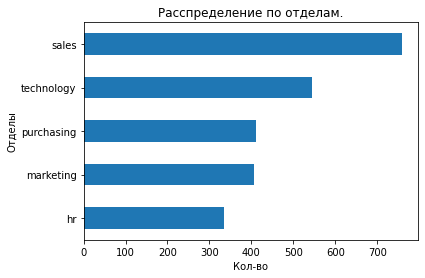

In [124]:
train_quit['dept'].value_counts(ascending=True).plot.barh()
plt.title('Расспределение по отделам.')
plt.xlabel('Кол-во')
plt.ylabel('Отделы')
plt.show()

Расспределение сотрудников по отделам: первое метсо - sales, второе - technology, третье - purchasing, четвертое - marketing, пятое - hr.

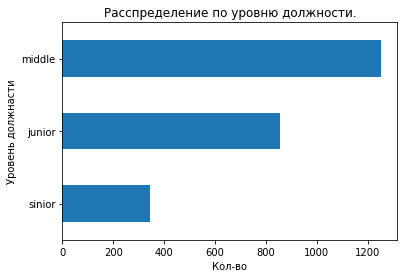

In [125]:
train_quit['level'].value_counts(ascending=True).plot.barh()
plt.title('Расспределение по уровню должности.')
plt.xlabel('Кол-во')
plt.ylabel('Уровень должнасти')
plt.show()

Самый распространенный уровень должности - junior, с не большим отстованием - middlle, меньше всего сотрудников с должностью sinior.

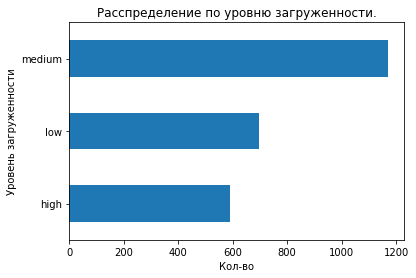

In [126]:
train_quit['workload'].value_counts(ascending=True).plot.barh()
plt.title('Расспределение по уровню загруженности.')
plt.xlabel('Кол-во')
plt.ylabel('Уровень загруженности')
plt.show()

В основном, уровень загруженности сотрудников - medium, следом идет загруженность уровня low, наименее распространен уровень high.

In [127]:
train_quit['employment_years'].describe()

count    2455.000000
mean        4.320163
std         2.600416
min         1.000000
25%         2.000000
50%         4.000000
75%         6.000000
max        10.000000
Name: employment_years, dtype: float64

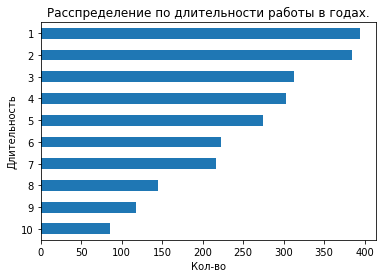

In [128]:
train_quit['employment_years'].value_counts(ascending=True).plot.barh()
plt.title('Расспределение по длительности работы в годах.')
plt.xlabel('Кол-во')
plt.ylabel('Длительность')
plt.show()

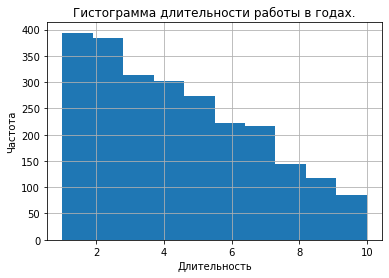

In [129]:
train_quit['employment_years'].hist()
plt.title('Гистограмма длительности работы в годах.')
plt.ylabel('Частота')
plt.xlabel('Длительность')
plt.show()

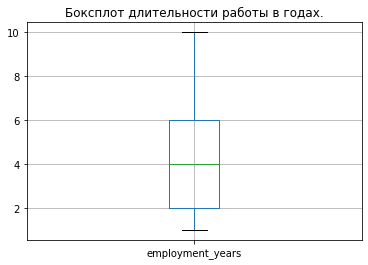

In [130]:
train_quit.boxplot(column='employment_years')
plt.title('Боксплот длительности работы в годах.')
plt.show()

Большая часть сатрудников работает в компании от 2 до 6 лет. При этом, самый распространенный период работы - 1 год.

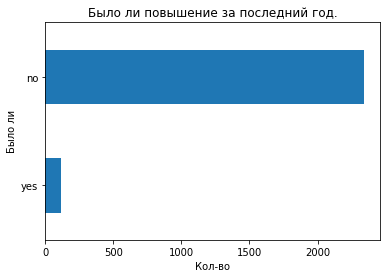

In [131]:
train_quit['last_year_promo'].value_counts(ascending=True).plot.barh()
plt.title('Было ли повышение за последний год.')
plt.xlabel('Кол-во')
plt.ylabel('Было ли')
plt.show()

Только небольшая часть сотрудников получила повышение за последний год.

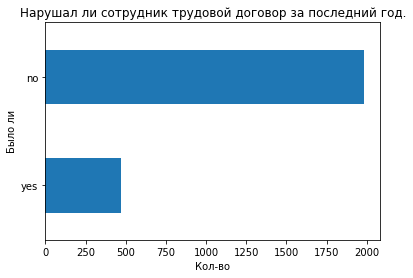

In [132]:
train_quit['last_year_violations'].value_counts(ascending=True).plot.barh()
plt.title('Нарушал ли сотрудник трудовой договор за последний год.')
plt.xlabel('Кол-во')
plt.ylabel('Было ли')
plt.show()

Примерно у одной пятой части сотрудников были нарушения трудового договора за последний год.

In [133]:
train_quit['supervisor_evaluation'].describe()

count    2455.000000
mean        3.355193
std         1.091993
min         1.000000
25%         3.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: supervisor_evaluation, dtype: float64

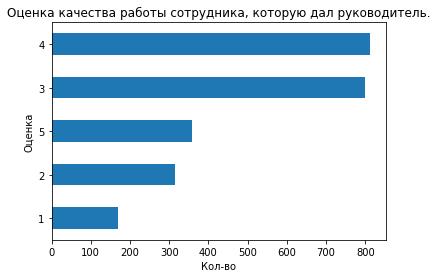

In [134]:
train_quit['supervisor_evaluation'].value_counts(ascending=True).plot.barh()
plt.title('Оценка качества работы сотрудника, которую дал руководитель.')
plt.xlabel('Кол-во')
plt.ylabel('Оценка')
plt.show()

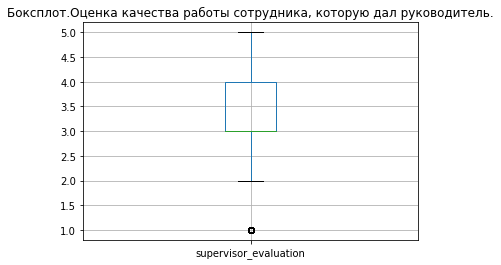

In [135]:
train_quit.boxplot(column='supervisor_evaluation')
plt.title('Боксплот.Оценка качества работы сотрудника, которую дал руководитель.')
plt.show()

4 - самая расспространенная оценка качества работы сотрудника, которую дал руководитель, далее идет 3. На эти две оценки приходится примерно половина оценок. Следом идет оценка 5, потом 2, наименее распространена оценка 1. Боксплот расценивает эту оценку как выброс, на столько она редко встречается.

In [136]:
train_quit['salary'].describe()

count     2455.000000
mean     37665.824847
std      16342.191468
min      12000.000000
25%      25200.000000
50%      34800.000000
75%      48000.000000
max      96000.000000
Name: salary, dtype: float64

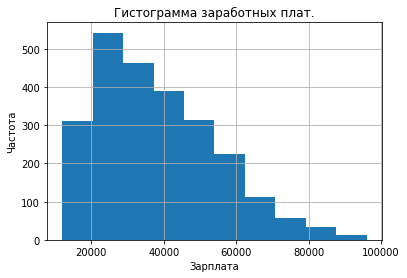

In [137]:
train_quit['salary'].hist()
plt.title('Гистограмма заработных плат.')
plt.ylabel('Частота')
plt.xlabel('Зарплата')
plt.show()

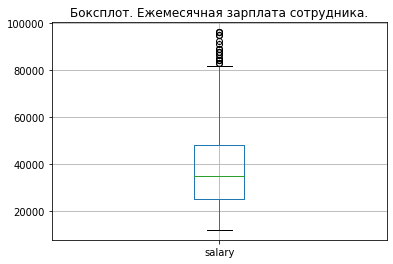

In [138]:
train_quit.boxplot(column='salary')
plt.title('Боксплот. Ежемесячная зарплата сотрудника.')
plt.show()

Ежемесячная зарплата сотрудника, в основном, лежит в диапозоне от 25200 до 48000. При этом, на боксплоте мы видим выбросы в верхней части, это зарплаты топ сотрудников компании.

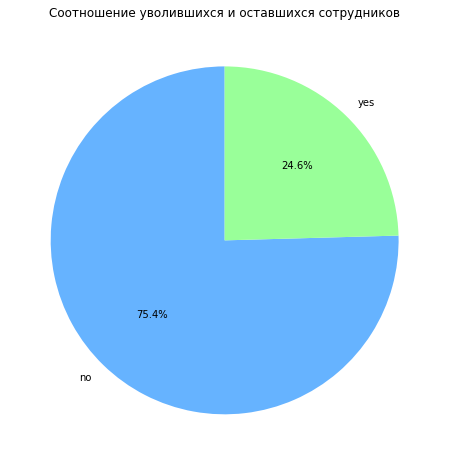

In [139]:
quit_counts = train_quit['quit'].value_counts()

# Построение круговой диаграммы
plt.figure(figsize=(8, 8))
plt.pie(quit_counts, labels=quit_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#99ff99'])
plt.title('Соотношение уволившихся и оставшихся сотрудников')
plt.show()

Соотношение уволившихся и оставшихся сотрудников 25% на 75%.

### 3.2 Составление портрета уволившегося сотрудника.

Сейчас нужно составить портрет уволившегося сотрудника. Для этого посмотрим расспределение увольнений по всем признакам.

In [140]:
train_quit.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
0,723290,sales,middle,high,2,no,no,4,54000,no
1,814010,sales,junior,medium,2,no,no,4,27600,no
2,155091,purchasing,middle,medium,5,no,no,1,37200,no
3,257132,sales,junior,medium,2,no,yes,3,24000,yes
4,910140,marketing,junior,medium,2,no,no,5,25200,no


In [141]:
# расчет процента
percentage_quit_by_dept = train_quit.groupby('dept')['quit'].value_counts(normalize=True).loc[:, 'yes'] * 100

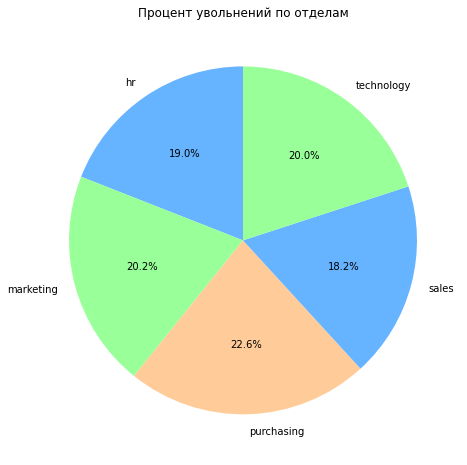

In [142]:
# круговая диаграмма
plt.figure(figsize=(8, 8))
plt.pie(percentage_quit_by_dept, labels=percentage_quit_by_dept.index,
        autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#99ff99','#ffcc99'])
plt.title('Процент увольнений по отделам')
plt.show()

Самый высокий процент уврольнений в отделе purchasing - 22.6%, в отделах marketing и technology по 20%, в hr - 19% и 18% в отделе sales. Процент увольнений по отделам выглядит более менее однородным, нельзя сказать, что из какого-то отдела сотрудники сбегают.

In [143]:
# расчет процента
percentage_quit_by_level = train_quit.groupby('level')['quit'].value_counts(normalize=True).loc[:, 'yes'] * 100

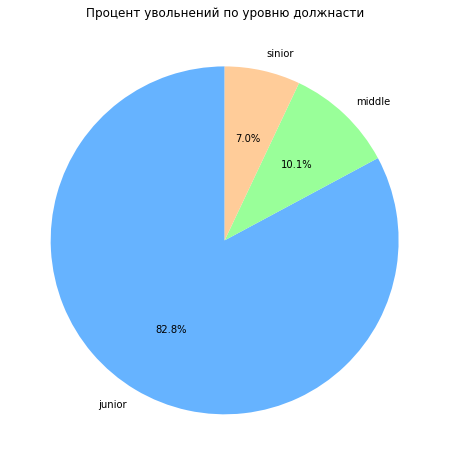

In [144]:
# круговая диаграмма
plt.figure(figsize=(8, 8))
plt.pie(percentage_quit_by_level, labels=percentage_quit_by_level.index,
        autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#99ff99','#ffcc99'])
plt.title('Процент увольнений по уровню должнасти')
plt.show()

С огромным перевесом самый большой процент увольнений на должностях уровня junior - 82.8%, middlle - 10.1% уволившихся, для sinior это только 7%. Это стандартная ситуация. Текучка происходит в нижних слоях карпоротивной структуры. Если человек получил повышение, которое, разумеется, приводит и к повышению зарплаты, у него будет больше мотивации продолжить работу в компании.

In [145]:
# расчет процента
percentage_quit_by_workload = train_quit.groupby('workload')['quit'].value_counts(normalize=True).loc[:, 'yes'] * 100

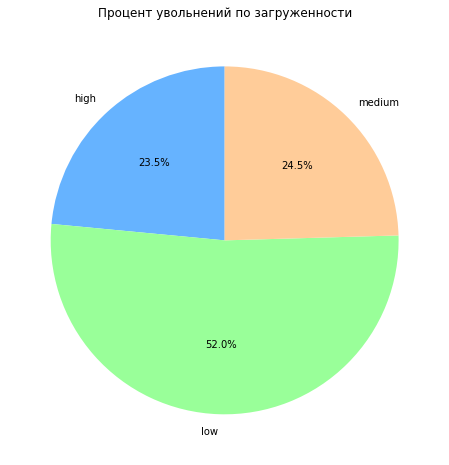

In [146]:
# круговая диаграмма
plt.figure(figsize=(8, 8))
plt.pie(percentage_quit_by_workload, labels=percentage_quit_by_workload.index,
        autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#99ff99','#ffcc99'])
plt.title('Процент увольнений по загруженности')
plt.show()

In [147]:
# расчет процента
percentage_workload_by_level = train_quit.groupby('level')['workload'].value_counts(normalize=True).loc[:, 'low'] * 100
percentage_workload_by_level

level
junior    35.397196
middle    27.272727
sinior    14.782609
Name: workload, dtype: float64

52% увольнений приходится на сотрудников с загруженностью low, для загруженностей medium и high соотношение примерно одинаково - 24.5% и 23.5% соответсвенно. У нас нет информации с чем именно связан уровень загруженности сотрудников. Но можно предположить, что сотрудники с уровнем low, а 35% из них это сотрудники уровня junior, не получают те условия работы(задания, направление деятельности) на которые они расчитывали.

In [148]:
# расчет процента
percentage_quit_by_employment_years = train_quit.groupby('employment_years')['quit'].value_counts(normalize=True).loc[:, 'yes'] * 100

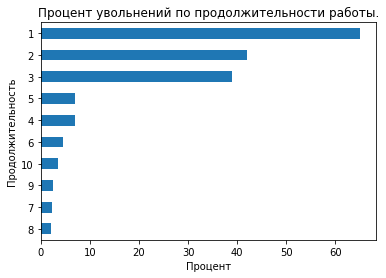

In [149]:
# круговая диаграмма
percentage_quit_by_employment_years.sort_values().plot.barh()
plt.title('Процент увольнений по продолжительности работы.')
plt.xlabel('Процент')
plt.ylabel('Продолжительность')
plt.show()

Большая часть увольнений приходится на первые три года работы в компании, а лидирует первый год. Это может быть связано с тем, что сотрудники не получают повышение или прибавки к зарплате за это время, у них отсутсвует карьерный рост, поэтому они могут уйти из компании. 

In [150]:
# расчет процента
percentage_quit_by_last_year_promo = (train_quit.groupby('last_year_promo')['quit'].
                                      value_counts(normalize=True).loc[:,'yes'] * 100)

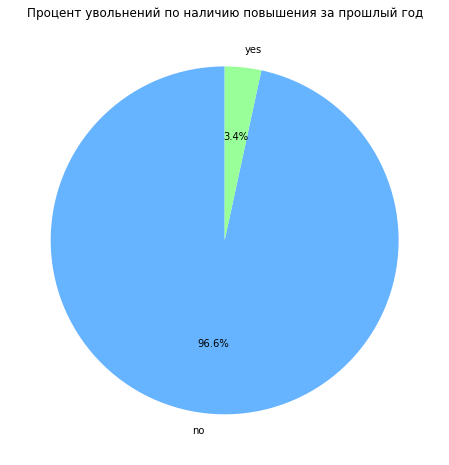

In [151]:
# круговая диаграмма
plt.figure(figsize=(8, 8))
plt.pie(percentage_quit_by_last_year_promo, labels=percentage_quit_by_last_year_promo.index,
        autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#99ff99','#ffcc99'])
plt.title('Процент увольнений по наличию повышения за прошлый год')
plt.show()

96.6% увольнений пришлось на сотрудников, которые не получили повышение за прошлый год, и только 3.4% на тех, кто получил. Эта статистика подтверждает предыдущие выводы. Для сотрудников крайне важно продвижение по карьерной леснице.

In [152]:
# расчет процента
percentage_quit_by_last_year_violations = (train_quit.groupby('last_year_violations')['quit'].
                                      value_counts(normalize=True).loc[:,'yes'] * 100)

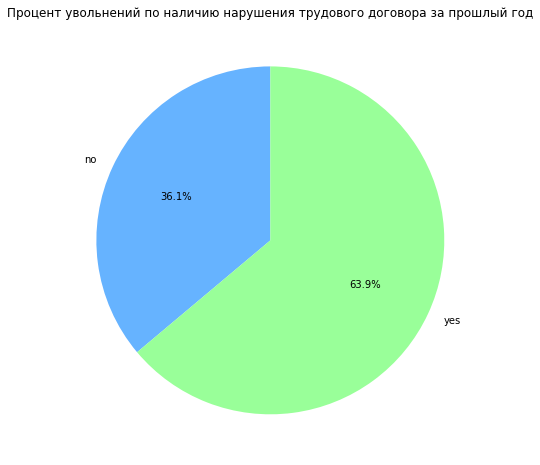

In [153]:
# круговая диаграмма
plt.figure(figsize=(8, 8))
plt.pie(percentage_quit_by_last_year_violations, labels=percentage_quit_by_last_year_violations.index,
        autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#99ff99','#ffcc99'])
plt.title('Процент увольнений по наличию нарушения трудового договора за прошлый год')
plt.show()

Важную роль играет наличие нарушения трудового договора за прошлый год. 63.9% уволившихся сотрудников имели нарушение. Как уже говорилось ранее, у нас нет подробной информации о санкциях, которые накладываются на сотрудников свершивших нарушение, но можно утверждать, что последсвия нарушений сильно влияют на увольнение сотрудника.

In [154]:
# расчет процента
percentage_quit_by_supervisor_evaluation = (train_quit.groupby('supervisor_evaluation')['quit'].
                                      value_counts(normalize=True).loc[:,'yes'] * 100)

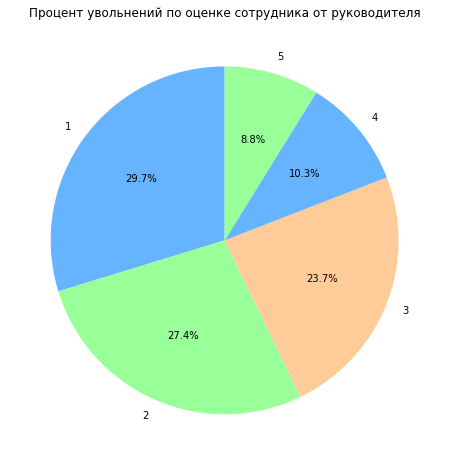

In [155]:
# круговая диаграмма
plt.figure(figsize=(8, 8))
plt.pie(percentage_quit_by_supervisor_evaluation, labels=percentage_quit_by_supervisor_evaluation.index,
        autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#99ff99','#ffcc99'])
plt.title('Процент увольнений по оценке сотрудника от руководителя')
plt.show()

Большая часть увольнений(80.8%) пришлась на сотрудников получивших низкие оценки от своих менеджеров - от 1 до 3. Так же у нас нет критериев по которым менеджера выставляют оценки. Можем предположить, что сотрудники с низкими оценками хуже справлялись со своими должностными обязонностями, это влияло и на карьерный рост и на удовлетворенность работой, что и привело к увольнению.

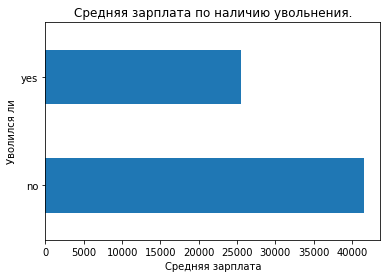

In [156]:
train_quit.groupby('quit')['salary'].mean().plot.barh()
plt.title('Средняя зарплата по наличию увольнения.')
plt.xlabel('Средняя зарплата')
plt.ylabel('Уволился ли')
plt.show()

Средняя зарплата сотрудников сильно отлиается для тех кто уволился и тех кто остался(25000 и 40000+ соттвественно). Так же это может быть связанно с отсутсвием карьерного роста в компании.

#### 3.2.1 Портрет уволившегося сотрудника.
1. Нет большой разницы в каком отделе работает сотрудник, лишь с небольшой долей вероятности это будет отдел purchasing.
2. Скорее всего это будет сотрудник уровня junior(82.8% пришлось на этот уровень).
3. 52% увольнений приходится на сотрудников с загруженностью low, у сотрудника будет низкий уровень загруженности.
4. Большая часть увольнений приходится на первые три года работы в компании, а лидирует первый год. Скорее всего, сотрудник будет работать в компании недолго.
5. 96.6% увольнений пришлось на сотрудников, которые не получили повышение за прошлый год, наш сотрудник не получил повышение.
6. Важную роль играет наличие нарушения трудового договора за прошлый год. 63.9% уволившихся сотрудников имели нарушение. Наш клиент в их числе.
7. Большая часть увольнений(80.8%) пришлась на сотрудников получивших низкие оценки от своих менеджеров - от 1 до 3. Сотрудник будет иметь низкую оценку от менеджера.
8. Средняя зарплата уволившигося сотрудника будет до 25000.

### 3.3 Анализ quit_test_features.

Тестовые данные с входными признаками точно такие же как и в первой задаче. Поэтому нет необходимости в их анализе.

### 3.4 Анализ quit_test_target.

In [157]:
quit_test_target.head()

,id,quit
0,999029,yes
1,372846,no
2,726767,no
3,490105,no
4,416898,yes


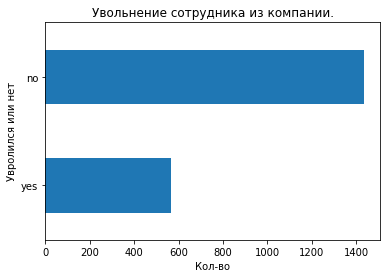

In [158]:
quit_test_target['quit'].value_counts(ascending=True).plot.barh()
plt.title('Увольнение сотрудника из компании.')
plt.xlabel('Кол-во')
plt.ylabel('Увролился или нет')
plt.show()

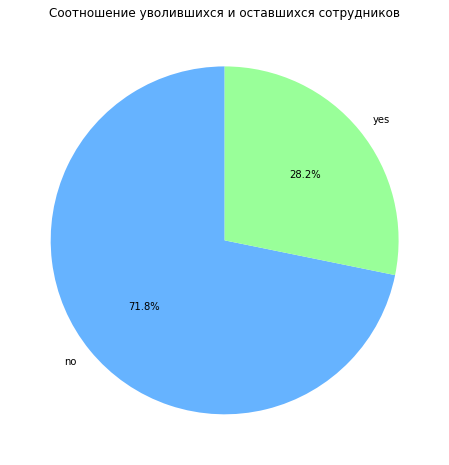

In [159]:
quit_test_counts = quit_test_target['quit'].value_counts()

# Построение круговой диаграммы
plt.figure(figsize=(8, 8))
plt.pie(quit_test_counts, labels=quit_test_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#99ff99'])
plt.title('Соотношение уволившихся и оставшихся сотрудников')
plt.show()

Соотношение уволившихся и оставшихся сотрудников 28.2% на 71.8%.

### 3.5 Влияние job_satisfaction_rate на quit.

Далее нам нужно проверить как уровень удовлетворенности работой сотрудника влияет на увольнение. Для этого объединим таблицы с входными и целевым признаком а так же добавим в получившуюся таблицу столбец с предсказанными значением job_satisfaction_rate.

In [160]:
# объединение таблиц
test_quit = quit_test_features.merge(quit_test_target, on='id')
test_quit.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
0,485046,marketing,junior,medium,2,no,no,5,28800,no
1,686555,hr,junior,medium,1,no,no,4,30000,no
2,467458,sales,middle,low,5,no,no,4,19200,no
3,418655,sales,middle,low,6,no,no,4,19200,no
4,789145,hr,middle,medium,5,no,no,5,40800,no


In [161]:
test_quit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     2000 non-null   int64 
 1   dept                   1998 non-null   object
 2   level                  1999 non-null   object
 3   workload               2000 non-null   object
 4   employment_years       2000 non-null   int64 
 5   last_year_promo        2000 non-null   object
 6   last_year_violations   2000 non-null   object
 7   supervisor_evaluation  2000 non-null   int64 
 8   salary                 2000 non-null   int64 
 9   quit                   2000 non-null   object
dtypes: int64(4), object(6)
memory usage: 171.9+ KB


In [162]:
test_quit.duplicated().sum()

0

Проверили формат данных и дубликаты все в норме.

In [163]:
# добавление стлбца job_satisfaction_rate
test_quit['job_satisfaction_rate'] = best_model.predict(test_quit.drop(['id','quit'],axis=1)).round(2)
test_quit.head()

/opt/conda/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit,job_satisfaction_rate
0,485046,marketing,junior,medium,2,no,no,5,28800,no,0.86
1,686555,hr,junior,medium,1,no,no,4,30000,no,0.68
2,467458,sales,middle,low,5,no,no,4,19200,no,0.66
3,418655,sales,middle,low,6,no,no,4,19200,no,0.66
4,789145,hr,middle,medium,5,no,no,5,40800,no,0.80


In [164]:
test_quit.isna().sum()

id                       0
dept                     2
level                    1
workload                 0
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
quit                     0
job_satisfaction_rate    0
dtype: int64

Кол-во пропусков осталось прежним.

In [165]:
test_quit[test_quit['quit'] == 'no']['job_satisfaction_rate'].describe()

count    1436.000000
mean        0.608997
std         0.196027
min         0.080000
25%         0.480000
50%         0.660000
75%         0.790000
max         0.970000
Name: job_satisfaction_rate, dtype: float64

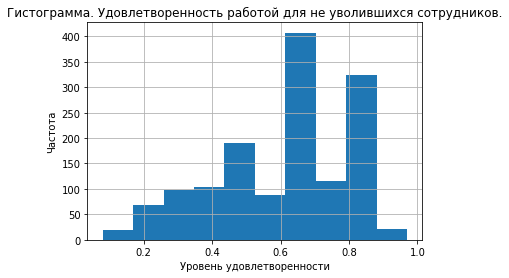

In [166]:
test_quit[test_quit['quit'] == 'no']['job_satisfaction_rate'].hist()
plt.title('Гистограмма. Удовлетворенность работой для не уволившихся сотрудников.')
plt.xlabel('Уровень удовлетворенности')
plt.ylabel('Частота')
plt.show()

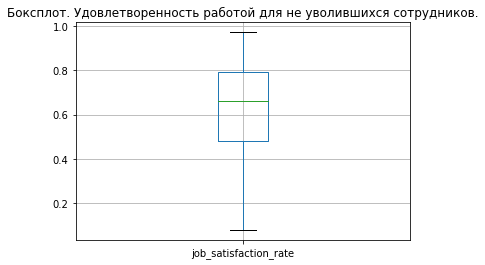

In [167]:
test_quit[test_quit['quit'] == 'no'].boxplot(column='job_satisfaction_rate')
plt.title('Боксплот. Удовлетворенность работой для не уволившихся сотрудников.')
plt.show()

В основном, уровень удовлетворенности сотрудников, оставшихся в компании лежит в пределах от 48% до 79%. 

In [168]:
test_quit[test_quit['quit'] == 'yes']['job_satisfaction_rate'].describe()

count    564.000000
mean       0.398723
std        0.184007
min        0.060000
25%        0.240000
50%        0.360000
75%        0.520000
max        0.960000
Name: job_satisfaction_rate, dtype: float64

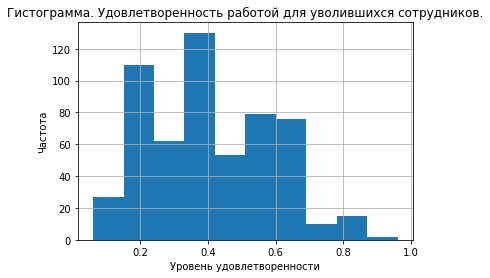

In [169]:
test_quit[test_quit['quit'] == 'yes']['job_satisfaction_rate'].hist()
plt.title('Гистограмма. Удовлетворенность работой для уволившихся сотрудников.')
plt.xlabel('Уровень удовлетворенности')
plt.ylabel('Частота')
plt.show()

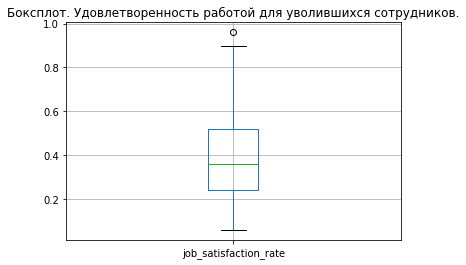

In [170]:
test_quit[test_quit['quit'] == 'yes'].boxplot(column='job_satisfaction_rate')
plt.title('Боксплот. Удовлетворенность работой для уволившихся сотрудников.')
plt.show()

У сотрудников покинувших компанию уровень удовлетворенности лежит в пределах от 24% до 52%, что намного ниже чем у сотрудников оставшихся - от 48% до 79%. Так же на боксплоте мы види выброс. Сотрудник мог быть доволен работой, но по личным принам покинул компанию.

#### 3.5.1 Вывод по влиянию job_satisfaction_rate на quit.
Действительно, сотрудники с более высоким уровнем удовлетворенности менее склоны к уходу из компании.

## 3.6 Вывод по исследовательскому анализу.
1. Анализ train_quit: <br>
1) Расспределение сотрудников по отделам: первое метсо - sales, второе - technology, третье - purchasing, четвертое - marketing, пятое - hr.<br>
2) Самый распространенный уровень должности - junior, с не большим отстованием - middlle, меньше всего сотрудников с должностью sinior.<br>
3) В основном, уровень загруженности сотрудников - medium, следом идет загруженность уровня low, наименее распространен уровень high.<br>
4) Большая часть сатрудников работает в компании от 2 до 6 лет. При этом, самый распространенный период работы - 1 год.<br>
5) Только небольшая часть сотрудников получила повышение за последний год.<br>
6) Примерно у одной пятой части сотрудников были нарушения трудового договора за последний год.<br>
7) 4 - самая расспространенная оценка качества работы сотрудника, которую дал руководитель, далее идет 3. На эти две оценки приходится примерно половина оценок. Следом идет оценка 5, потом 2, наименее распространена оценка 1. Боксплот расценивает эту оценку как выброс, на столько она редко встречается.<br>
8) Ежемесячная зарплата сотрудника, в основном, лежит в диапозоне от 25200 до 48000. При этом, на боксплоте мы видим выбросы в верхней части, это зарплаты топ сотрудников компании.<br>
9) Соотношение уволившихся и оставшихся сотрудников 25% на 75%.<br>
2. Составление портрета уволившегося сотрудника:<br>
1) Нет большой разницы в каком отделе работает сотрудник, лишь с небольшой долей вероятности это будет отдел purchasing.<br>
2) Скорее всего это будет сотрудник уровня junior(82.8% пришлось на этот уровень).<br>
3) 52% увольнений приходится на сотрудников с загруженностью low, у сотрудника будет низкий уровень загруженности.<br>
4) Большая часть увольнений приходится на первые три года работы в компании, а лидирует первый год. Скорее всего, сотрудник будет работать в компании недолго.<br>
5) 96.6% увольнений пришлось на сотрудников, которые не получили повышение за прошлый год, наш сотрудник не получил повышение.<br>
6) Важную роль играет наличие нарушения трудового договора за прошлый год. 63.9% уволившихся сотрудников имели нарушение. Наш клиент в их числе.<br>
7) Большая часть увольнений(80.8%) пришлась на сотрудников получивших низкие оценки от своих менеджеров - от 1 до 3. Сотрудник будет иметь низкую оценку от менеджера.<br>
8) Средняя зарплата уволившигося сотрудника будет до 25000.<br>
3. Анализ quit_test_features: тестовые данные с входными признаками точно такие же как и в первой задаче. Поэтому нет необходимости в их анализе.<br>
4. Анализ quit_test_target: соотношение уволившихся и оставшихся сотрудников 28.2% на 71.8%.<br>
5. Влияние job_satisfaction_rate на quit:Действительно, сотрудники с более высоким уровнем удовлетворенности менее склоны к уходу из компании. 

## 4. Корреляционный анализ.

Далее проведем корреляционный анализ тренировочной и тестовой таблиц.

### 4.1 Корреляционный анализ тренировочной таблицы.

interval columns not set, guessing: ['employment_years', 'supervisor_evaluation', 'salary']


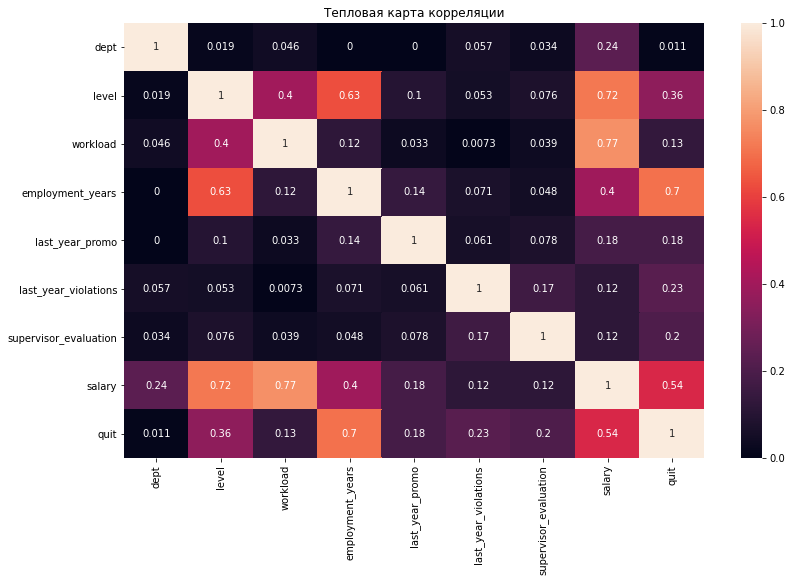

In [171]:
plt.figure(figsize=(13, 8))
sns.heatmap(train_quit.drop('id',axis=1).phik_matrix(), annot=True) 
plt.title("Тепловая карта корреляции")
plt.show()

1. Целевой признак(quit) имеет наибольшую корреляцию с employment_years - 0.7, исходя из предыдущего анализа, можно преположить, что сотрудники проработовшие в компании определенный период и не получившие ,по их мнению, заслуженного повышения склонны к увольнению. 
2. Так же есть корееляция с salary - 0.54, действительно, если сотрудник не получет желаемую оплату труда, у него будет меньше причин остаться в компании.
3. Стоит отметить совершенно невыраженную корелляцию с dept. Это говорит о том, что нет разницы в каком отделе работает сотрудник.
4. Корреляция между входными признаками схожа с первой задачей.

Сейчас рассмотрим корреляцию между входными признаками для разных груп сотрудников - тех кто уволися и тех кто остался.

interval columns not set, guessing: ['employment_years', 'supervisor_evaluation', 'salary']


/opt/conda/lib/python3.9/site-packages/phik/data_quality.py:82: UserWarning: Not enough unique value for variable quit for analysis 1. Dropping this column
  warnings.warn(


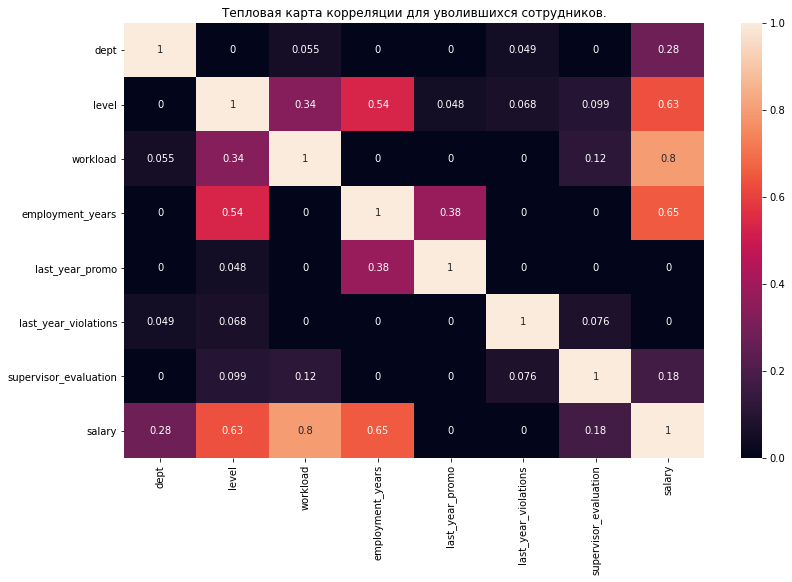

In [172]:
plt.figure(figsize=(13, 8))
sns.heatmap(train_quit[train_quit['quit'] == 'yes'].drop('id',axis=1).phik_matrix(), annot=True) 
plt.title("Тепловая карта корреляции для уволившихся сотрудников.")
plt.show()

interval columns not set, guessing: ['employment_years', 'supervisor_evaluation', 'salary']


/opt/conda/lib/python3.9/site-packages/phik/data_quality.py:82: UserWarning: Not enough unique value for variable quit for analysis 1. Dropping this column
  warnings.warn(


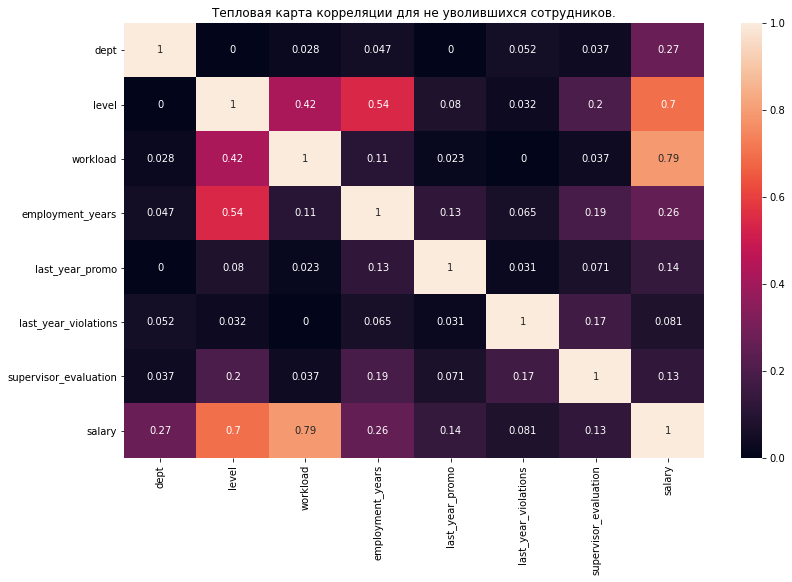

In [173]:
plt.figure(figsize=(13, 8))
sns.heatmap(train_quit[train_quit['quit'] == 'no'].drop('id',axis=1).phik_matrix(), annot=True) 
plt.title("Тепловая карта корреляции для не уволившихся сотрудников.")
plt.show()

Выделим интересные моменты, отличающие разные группы сотрудников.
1. У сотрудников оставшихся в компании корелляция между salary и employment_years составляет 0.26, а у уволившихся - 0.65. Это показывает, что сотрудники, которые остались работать в компании смогли быстрее получить более высокую зарплату.
2. Корреляция между salary и level у сотрудников оставшихся в компании составляет 0.7, для уволившихся - 0.63. Можно предположить, что даже после повышении в должности уровень зарплаты уволившихся сотрудников вырос не так сильно как им хотелось.

### 4.2 Корреляционный анализ тестовой таблицы.

interval columns not set, guessing: ['employment_years', 'supervisor_evaluation', 'salary', 'job_satisfaction_rate']


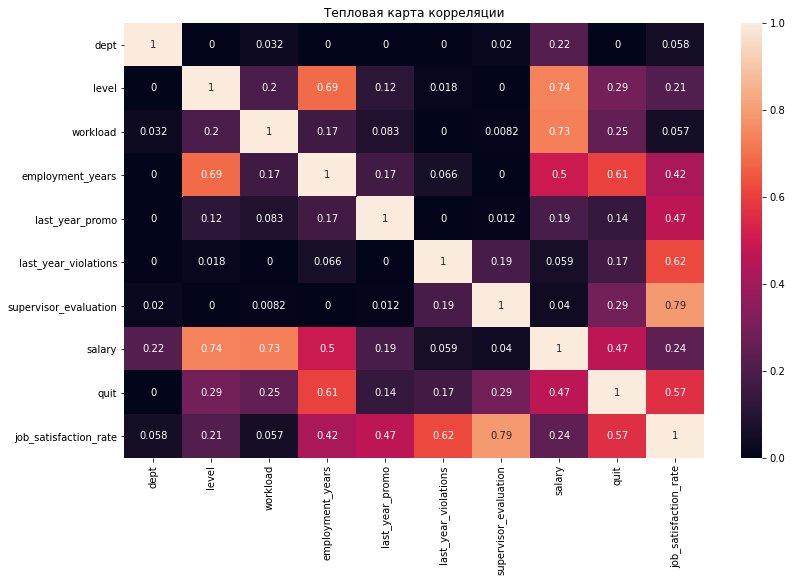

In [174]:
plt.figure(figsize=(13, 8))
sns.heatmap(test_quit.drop('id',axis=1).phik_matrix(), annot=True) 
plt.title("Тепловая карта корреляции")
plt.show()

В таблице с тестовыми данными корреляция схожа с тренировочной таблицей.

### 4.3 Вывод  по корреляционному анализу.
1. Вывод по тренировочной таблице: <br>
1) Целевой признак(quit) имеет наибольшую корреляцию с employment_years - 0.7, исходя из предыдущего анализа, можно преположить, что сотрудники проработовшие в компании определенный период и не получившие ,по их мнению, заслуженного повышения склонны к увольнению. <br>
2) Так же есть корееляция с salary - 0.54, действительно, если сотрудник не получет желаемую оплату труда, у него будет меньше причин остаться в компании.<br>
3) Стоит отметить совершенно невыраженную корелляцию с dept. Это говорит о том, что нет разницы в каком отделе работает сотрудник.<br>
4) Корреляция между входными признаками схожа с первой задачей.<br>
2. Вывод для разных груп сотрудников:<br>
1) У сотрудников оставшихся в компании корелляция между salary и employment_years составляет 0.26, а у уволившихся - 0.65. Это показывает, что сотрудники, которые остались работать в компании смогли быстрее получить более высокую зарплату.<br>
2) Корреляция между salary и level у сотрудников оставшихся в компании составляет 0.7, для уволившихся - 0.63. Можно предположить, что даже после повышении в должности уровень зарплаты уволившихся сотрудников вырос не так сильно как им хотелось.<br>
3. Вывод по таблице с тестовыми данными: в таблице с тестовыми данными корреляция схожа с тренировочной таблицей.

## 5. Подготовка данных.

Как мы выяснили ранее, job_satisfaction_rate действительно влияет на увольнение сотрудника, пожтому добавим предсказанные значения в тренировочную таблицу.

In [175]:
train_quit['job_satisfaction_rate'] = best_model.predict(train_quit.drop(['id'],axis=1)).round(2)
train_quit.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit,job_satisfaction_rate
0,723290,sales,middle,high,2,no,no,4,54000,no,0.64
1,814010,sales,junior,medium,2,no,no,4,27600,no,0.83
2,155091,purchasing,middle,medium,5,no,no,1,37200,no,0.38
3,257132,sales,junior,medium,2,no,yes,3,24000,yes,0.35
4,910140,marketing,junior,medium,2,no,no,5,25200,no,0.75


Закодируем целевой признак(quit), где 1 - уволился, 0 - нет

In [176]:
train_quit['quit'] = train_quit['quit'].apply(lambda x: 1 if x == 'yes' else 0)
test_quit['quit'] = test_quit['quit'].apply(lambda x: 1 if x == 'yes' else 0)

Создадим переменные с категориальными и числовыми столбцами. Так же переменные с целевыми и входными признаками для тренровочных и тестовых данных.

In [177]:
X_train2 = train_quit.drop(['id','quit','dept'],axis=1)
y_train2 = train_quit['quit']
X_test2 = test_quit.drop(['id','quit','dept'],axis=1)
y_test2 = test_quit['quit']

ohe_columns2 = ['last_year_promo','last_year_violations']
ord_columns2 = ['level','workload']
num_columns2 = ['employment_years','salary','job_satisfaction_rate']

Создадим пайплайн, включающий в себя этапы предобработки, кодирования и модель.

In [178]:
# создаём пайплайн для подготовки признаков из списка ohe_columns: заполнение пропусков и OHE-кодирование
# SimpleImputer + OHE
ohe_pipe2 = Pipeline(
    [('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False))
    ]
    )

# создаём пайплайн для подготовки признаков из списка ord_columns: заполнение пропусков и Ordinal-кодирование
# SimpleImputer + OE
ord_pipe2 = Pipeline(
    [('simpleImputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ord',  OrdinalEncoder(
                categories=[
                    ['junior', 'middle', 'sinior'],
                    ['low', 'medium', 'high'],
                ], 
                handle_unknown='use_encoded_value', unknown_value= -1
            )
        ),
     ('simpleImputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
    ]
)



In [179]:
# создаём общий пайплайн для подготовки данных
data_preprocessor2 = ColumnTransformer(
    [('ohe', ohe_pipe2, ohe_columns2),
     ('ord', ord_pipe2, ord_columns2),
     ('num', MinMaxScaler(), num_columns2)
    ], 
    remainder='passthrough'
)    

In [180]:
# создаём итоговый пайплайн: подготовка данных и модель
pipe_final2 = Pipeline([
    ('preprocessor', data_preprocessor2),
    ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
])

Создадим словарь с моделями и параметрами к ним.

In [181]:
param_grid2 = [
    # словарь для модели DecisionTreeClassifier()
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(2,5),
        'models__max_features': range(2,5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    
    # словарь для модели RandomForestClassifier()
    {
        'models': [RandomForestClassifier(random_state=RANDOM_STATE)],
        'preprocessor__num': ['passthrough'],
        'models__n_estimators': range(50, 301, 30),
        'models__max_depth': range(7,50,1)
    },
    
    # словарь для модели KNeighborsClassifier() 
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(2,5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']   
    },

    # словарь для модели LogisticRegression()
    {
        'models': [LogisticRegression(
            random_state=RANDOM_STATE, 
            solver='liblinear', 
            penalty='l1'
        )],
        'models__C': range(1,5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    
    # словарь для модели SVC()
    {
        'models': [SVC(random_state=RANDOM_STATE)],
        'models__kernel': ['rbf', 'sigmoid', 'linear'],
        'models__C': range(1,5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough'] 
    }
]


### 5.1 Вывод по подготовке данных.
1. В тренировочные данные добавили предсказанные значения job_satisfaction_rate.
2. Создадали переменные с категориальными и числовыми столбцами. Так же переменные с целевыми и входными признаками для тренровочных и тестовых данных.
3. Создали пайплайн, включающий в себя этапы предобработки, кодирования и модель, и словарь с моделями и параметрами к ним.

## 6. Обучение модели.

Произведем рандомный поиск лучшей модели и ее параметров, т.к. кол-во возможных комбинаций велико.

In [182]:
randomized_search2 = RandomizedSearchCV(
    pipe_final2,
    param_grid2,
    cv=3,
    n_jobs=-1,
    scoring='roc_auc',
    random_state=RANDOM_STATE,
    error_score='raise'
)    

In [183]:
randomized_search2.fit(X_train2, y_train2)

# вывод лучшей модели, ее параметров и метрик на тренировочной и тестовой выборках
print('Лучшая модель и её параметры:\n\n', randomized_search2.best_estimator_)
print ('Метрика лучшей модели на тренировочной выборке:', randomized_search2.best_score_)
y_test_pred2 = randomized_search2.predict_proba(X_test2)[:,1]
print(f'Метрика ROC-AUC на тестовой выборке: {roc_auc_score(y_test2, y_test_pred2)}')

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['last_year_promo',
                                                   'last_year_violations']),
                                                 ('ord',
                                    

Выведем резулбтаты работы всех моделей.

In [184]:
result2 = pd.DataFrame(randomized_search2.cv_results_)
display(result2[
    ['rank_test_score', 'param_models', 'mean_test_score','params']
].sort_values('rank_test_score'))

,rank_test_score,param_models,mean_test_score,params
2,1,RandomForestClassifier(random_state=42),0.939131,"{'preprocessor__num': 'passthrough', 'models__..."
9,2,RandomForestClassifier(random_state=42),0.937528,"{'preprocessor__num': 'passthrough', 'models__..."
0,3,RandomForestClassifier(random_state=42),0.937362,"{'preprocessor__num': 'passthrough', 'models__..."
1,4,RandomForestClassifier(random_state=42),0.936728,"{'preprocessor__num': 'passthrough', 'models__..."
5,5,RandomForestClassifier(random_state=42),0.935768,"{'preprocessor__num': 'passthrough', 'models__..."
6,6,RandomForestClassifier(random_state=42),0.935174,"{'preprocessor__num': 'passthrough', 'models__..."
8,7,RandomForestClassifier(random_state=42),0.933212,"{'preprocessor__num': 'passthrough', 'models__..."
4,8,"LogisticRegression(penalty='l1', random_state=...",0.919468,"{'preprocessor__num': 'passthrough', 'models__..."
7,9,DecisionTreeClassifier(random_state=42),0.871049,"{'preprocessor__num': StandardScaler(), 'model..."
3,10,SVC(random_state=42),0.765119,"{'preprocessor__num': 'passthrough', 'models__..."


Первые 7 мест занимает модель RandomForestClassifier.

### 6.1 Вывод по обучению модели.
1. RandomForestClassifier с параметрами max_depth=7, n_estimators=230 стала лучшей моделью. Метрика лучшей модели на тренировочной выборке: 0.9394345047468394 , Метрика ROC-AUC на тестовой выборке: 0.9278716983741284. Критерий успеха: ROC-AUC ≥ 0.91 на тестовой выборке.
2. Преимущества : <br>
1) Использование ансамбля деревьев: RandomForestClassidier является ансамблем деревьев решений. Он объединяет несколько деревьев, каждое из которых обучается на подмножестве данных и использует случайное подмножество признаков для каждого дерева. Это позволяет уменьшить переобучение и повысить обобщающую способность модели.<br>
2) Устойчивость к переобучению: Благодаря случайному выбору подмножества данных и признаков для каждого дерева, RandomForest обычно более устойчив к переобучению по сравнению с одним деревом решений.<br>
3) Обработка большого объема данных: RandomForest хорошо справляется с обработкой больших объемов данных и может эффективно работать с множеством признаков.<br>
4) Не чувствителен к масштабированию признаков: Деревья решений, в том числе и в составе RandomForest, не чувствительны к масштабированию признаков. Это может быть выгодно, если есть признаки с различными диапазонами значений.<br>
5) Способность к обработке нелинейных зависимостей: RandomForest может лучше справляться с моделированием сложных нелинейных зависимостей в данных, чем линейные модели.<br>

# Общий вывод.<br>
<br>
Перед нами стояло две задачи. Первая — построить модель, которая сможет предсказать уровень удовлетворённости сотрудника на основе данных заказчика. Ваша вторая задача — построить модель, которая сможет на основе данных заказчика предсказать то, что сотрудник уволится из компании.
В ходе работы были выполнены следующие шаги:<br>
<br>
Задача 1: предсказание уровня удовлетворённости сотрудника:<br>
<br>
1. Загрузка данных. Сохранили три таблицы в переменные. Во всех таблицах формат данных соответствует истеному.<br>
<br>
2. Предобработка данных:<br>
1) В данных отсутсвуют ошибки в записях.<br>
2) В тренировочной таблице и в таблице с входными признаками етсь пропуски. Их обработкой займемся в пайплайне при моделировании.<br>
3) Явных дубликатов нет.<br>
<br>
3. Исследовательский анализ данных:<br>
1. Анализ train_data: <br>
1) Расспределение сотрудников по отделам: первое метсо - sales, второе - technology, третье - purchasing, четвертое - marketing, пятое - hr.<br>
2) Самый распространенный уровень должности - junior, с не большим отстованием - middlle, меньше всего сотрудников с должностью sinior.<br>
3) В основном, уровень загруженности сотрудников - medium, следом идет загруженность уровня low, наименее распространен уровень high.<br>
4) Большая часть сатрудников работает в компании от 2 до 6 лет. При этом, самый распространенный период работы - 1 год.<br>
5) Только небольшая часть сотрудников получила повышение за последний год.<br>
6) Примерно у одной восьмой части сотрудников были нарушения трудового договора за последний год.<br>
7) 4 - самая расспространенная оценка качества работы сотрудника, которую дал руководитель, далее идет 3. На эти две оценки приходится примерно половина оценок. Следом идет оценка 5, потом 2, наименее распространена оценка 1. Боксплот расценивает эту оценку как выброс, на столько она редко встречается.<br>
8) Ежемесячная зарплата сотрудника, в основном, лежит в диапозоне от 22800 до 43200. При этом, на боксплоте мы видим выбросы в верхней части, это зарплаты топ сотрудников компании.<br>
9) Уровень удовлетворенности сотрудника, по большей части, лежит в диапозоне от 36% до 71%. При этом данные не имеют нормального расспределения.<br>
2. Анализ test_features: <br>
1) Расспределение сотрудников по отделам: первое метсо - sales, второе - technology, третье - marketing, четвертое - purchasing, пятое - hr.<br>
2) Самый распространенный уровень должности - junior, с не большим отстованием - middlle, меньше всего сотрудников с должностью sinior.<br>
3) В основном, уровень загруженности сотрудников - medium, следом идет загруженность уровня low, наименее распространен уровень high.<br>
4) Большая часть сатрудников работает в компании от 2 до 6 лет. При этом, самый распространенный период работы - 1 год.<br>
5) Только небольшая часть сотрудников получила повышение за последний год.<br>
6) Примерно у одной восьмой части сотрудников были нарушения трудового договора за последний год.<br>
7) 4 - самая расспространенная оценка качества работы сотрудника, которую дал руководитель, далее идет 3. На эти две оценки приходится примерно половина оценок. Следом идет оценка 5, потом 2, наименее распространена оценка 1. Боксплот расценивает эту оценку как выброс, на столько она редко встречается.<br>
8) Ежемесячная зарплата сотрудника, в основном, лежит в диапозоне от 22800 до 43200. При этом, на боксплоте мы видим выбросы в верхней части, это зарплаты топ сотрудников компании.<br>
3. Анализ test_target: <br>
1) Уровень удовлетворенности сотрудника, по большей части, лежит в диапозоне от 38% до 72%. При этом данные не имеют нормального расспределения.<br>
4. В целом, можно сказать, что тренировочные и тестовые данные похожи.<br>
<br>
4. Корреляционный анализ:<br>
1) Целевой признак - job_satisfaction_rate(уровень удовлетворённости сотрудника работой в компании) имеет наибольшую корреляцию с supervisor_evaluation(оценока работы сотрудника от менеджера) - 0.76. Это можно объяснить тем, что взаимоотношения между менеджером и сотрудником являются важным аспетком работы. Если менеджер высоко оценивает рабочие способности сотрудника, скорее всего, работник хорошо выполняет свои рабочие обязонности и благодаря этому имеет большее кол-во позитивного взаимодействия с менеджером, и наоборот, если работник плохо справляется со своими обязанностями, вряд ли он будет получать большое удовольствие от работы.<br>
2) Так же достаточно выраженная связь у целевого признака с last_year_violations(нарушение трудового договра). К сажелению, нам не предоставили подробнй информации об этом признаке, сложно сказать какие именно штрафные санкции накладываются на сотрудника, нарушевшего трудовой договор. Но отталкиваясь от того, что корреляция достаточно высока, можно сказать о значимости наличия или отсутвия нарушений на уровень удовлетворенности.<br>
3) Отметим высокую корреляцию между уровнем зароботной платы с загруженностью и уровнем должности сотрудника. Это выглядит вполне логично, сотрудник занимающий более высокую должность и работающий более усердно получует полее высокую оплату труда. <br>
4) При этом этом корреляция между зарплатой и продолжительностью работы в компании составляет 0.47. Также зависимость между уровнем должности и продолжительностью работы - 0.68. Это говорит о возможности быстрого роста в компании, хотя это происходит не так часто.<br>
<br>
5. Подготовка данных:<br>
1) Тестовые таблицы были объединены в одну.<br>
2) Создадали переменные с категориальными и числовыми столбцами. Так же переменные с целевыми и входными признаками для тренровочных и тестовых данных.<br>
3) Создали пайплайн, включающий в себя этапы предобработки, кодирования и модель, и словарь с моделями и параметрами к ним.<br>
<br>
6. Обучение моделей:<br>
1. RandomForestRegressor с параметрами max_depth=17, n_estimators=300 стала лучшей моделью. Метрика SMAPE на тренировочной выборке: 13.207289613825335 ,метрика SMAPE на тестовой выборке: 12.369961277125316. Критерий успеха: SMAPE ≤15 на тестовой выборке. <br>
2. Преимущества : <br>
1) Использование ансамбля деревьев: RandomForestRegressor является ансамблем деревьев решений. Он объединяет несколько деревьев, каждое из которых обучается на подмножестве данных и использует случайное подмножество признаков для каждого дерева. Это позволяет уменьшить переобучение и повысить обобщающую способность модели.<br>
2) Устойчивость к переобучению: Благодаря случайному выбору подмножества данных и признаков для каждого дерева, RandomForest обычно более устойчив к переобучению по сравнению с одним деревом решений.<br>
3) Обработка большого объема данных: RandomForest хорошо справляется с обработкой больших объемов данных и может эффективно работать с множеством признаков.<br>
4) Не чувствителен к масштабированию признаков: Деревья решений, в том числе и в составе RandomForest, не чувствительны к масштабированию признаков. Это может быть выгодно, если есть признаки с различными диапазонами значений.<br>
5) Способность к обработке нелинейных зависимостей: RandomForest может лучше справляться с моделированием сложных нелинейных зависимостей в данных, чем линейные модели.<br>
<br>
<br>
Задача 2: предсказание увольнения сотрудника из компании:<br>
<br>
1. Загрузка данных. Сохранили три таблицы в переменные. Во всех таблицах формат данных соответствует истеному.<br>
<br>
2. Предобработка данных.<br>
1) В данных отсутсвуют ошибки в записях.<br>
2) В тренировочной таблице и в таблице с входными признаками етсь пропуски. Их обработкой займемся в пайплайне при моделировании.<br>
3) Явных дубликатов нет.<br>
4) В тренировочной таблице обнаружили 1545 неполных дубликатов. Эти данные, хоть и не являются полными дубликатами, для модели они будут вредны, т.к. имея одинаковые входные признаки, целевой признак отличается. Поэтому модели будет тяжелее выявить закономерности.<br>
<br>
3. Исследовательский анализ:<br>
1. Анализ train_quit: <br>
1) Расспределение сотрудников по отделам: первое метсо - sales, второе - technology, третье - purchasing, четвертое - marketing, пятое - hr.<br>
2) Самый распространенный уровень должности - junior, с не большим отстованием - middlle, меньше всего сотрудников с должностью sinior.<br>
3) В основном, уровень загруженности сотрудников - medium, следом идет загруженность уровня low, наименее распространен уровень high.<br>
4) Большая часть сатрудников работает в компании от 2 до 6 лет. При этом, самый распространенный период работы - 1 год.<br>
5) Только небольшая часть сотрудников получила повышение за последний год.<br>
6) Примерно у одной пятой части сотрудников были нарушения трудового договора за последний год.<br>
7) 4 - самая расспространенная оценка качества работы сотрудника, которую дал руководитель, далее идет 3. На эти две оценки приходится примерно половина оценок. Следом идет оценка 5, потом 2, наименее распространена оценка 1. Боксплот расценивает эту оценку как выброс, на столько она редко встречается.<br>
8) Ежемесячная зарплата сотрудника, в основном, лежит в диапозоне от 25200 до 48000. При этом, на боксплоте мы видим выбросы в верхней части, это зарплаты топ сотрудников компании.<br>
9) Соотношение уволившихся и оставшихся сотрудников 25% на 75%.<br>
2. Составление портрета уволившегося сотрудника:<br>
1) Нет большой разницы в каком отделе работает сотрудник, лишь с небольшой долей вероятности это будет отдел purchasing.<br>
2) Скорее всего это будет сотрудник уровня junior(82.8% пришлось на этот уровень).<br>
3) 52% увольнений приходится на сотрудников с загруженностью low, у сотрудника будет низкий уровень загруженности.<br>
4) Большая часть увольнений приходится на первые три года работы в компании, а лидирует первый год. Скорее всего, сотрудник будет работать в компании недолго.<br>
5) 96.6% увольнений пришлось на сотрудников, которые не получили повышение за прошлый год, наш сотрудник не получил повышение.<br>
6) Важную роль играет наличие нарушения трудового договора за прошлый год. 63.9% уволившихся сотрудников имели нарушение. Наш клиент в их числе.<br>
7) Большая часть увольнений(80.8%) пришлась на сотрудников получивших низкие оценки от своих менеджеров - от 1 до 3. Сотрудник будет иметь низкую оценку от менеджера.<br>
8) Средняя зарплата уволившигося сотрудника будет до 25000.<br>
3. Анализ quit_test_features: тестовые данные с входными признаками точно такие же как и в первой задаче. Поэтому нет необходимости в их анализе.<br>
4. Анализ quit_test_target: соотношение уволившихся и оставшихся сотрудников 28.2% на 71.8%.<br>
5. Влияние job_satisfaction_rate на quit:Действительно, сотрудники с более высоким уровнем удовлетворенности менее склоны к уходу из компании. <br>
<br>
4. Корреляционный анализ:<br>
1. Вывод по тренировочной таблице: <br>
1) Целевой признак(quit) имеет наибольшую корреляцию с employment_years - 0.7, исходя из предыдущего анализа, можно преположить, что сотрудники проработовшие в компании определенный период и не получившие ,по их мнению, заслуженного повышения склонны к увольнению. <br>
2) Так же есть корееляция с salary - 0.54, действительно, если сотрудник не получет желаемую оплату труда, у него будет меньше причин остаться в компании.<br>
3) Стоит отметить совершенно невыраженную корелляцию с dept. Это говорит о том, что нет разницы в каком отделе работает сотрудник.<br>
4) Корреляция между входными признаками схожа с первой задачей.<br>
2. Вывод для разных груп сотрудников:<br>
1) У сотрудников оставшихся в компании корелляция между salary и employment_years составляет 0.26, а у уволившихся - 0.65. Это показывает, что сотрудники, которые остались работать в компании смогли быстрее получить более высокую зарплату.<br>
2) Корреляция между salary и level у сотрудников оставшихся в компании составляет 0.7, для уволившихся - 0.63. Можно предположить, что даже после повышении в должности уровень зарплаты уволившихся сотрудников вырос не так сильно как им хотелось.<br>
3. Вывод по таблице с тестовыми данными: в таблице с тестовыми данными корреляция схожа с тренировочной таблицей.<br>
<br>
5. Подготовка данных:<br>
1) В тренировочные данные добавили предсказанные значения job_satisfaction_rate.<br>
2) Создадали переменные с категориальными и числовыми столбцами. Так же переменные с целевыми и входными признаками для тренровочных и тестовых данных.<br>
3) Создали пайплайн, включающий в себя этапы предобработки, кодирования и модель, и словарь с моделями и параметрами к ним.<br>
<br>
6. Обучение модели:<br>
1. RandomForestClassifier с параметрами max_depth=7, n_estimators=230 стала лучшей моделью. Метрика лучшей модели на тренировочной выборке: 0.9394345047468394 , Метрика ROC-AUC на тестовой выборке: 0.9278716983741284. Критерий успеха: ROC-AUC ≥ 0.91 на тестовой выборке.
2. Преимущества : <br>
1) Использование ансамбля деревьев: RandomForestClassidier является ансамблем деревьев решений. Он объединяет несколько деревьев, каждое из которых обучается на подмножестве данных и использует случайное подмножество признаков для каждого дерева. Это позволяет уменьшить переобучение и повысить обобщающую способность модели.<br>
2) Устойчивость к переобучению: Благодаря случайному выбору подмножества данных и признаков для каждого дерева, RandomForest обычно более устойчив к переобучению по сравнению с одним деревом решений.<br>
3) Обработка большого объема данных: RandomForest хорошо справляется с обработкой больших объемов данных и может эффективно работать с множеством признаков.<br>
4) Не чувствителен к масштабированию признаков: Деревья решений, в том числе и в составе RandomForest, не чувствительны к масштабированию признаков. Это может быть выгодно, если есть признаки с различными диапазонами значений.<br>
5) Способность к обработке нелинейных зависимостей: RandomForest может лучше справляться с моделированием сложных нелинейных зависимостей в данных, чем линейные модели.<br>

# Рекомендации для бизнеса.
1. Уровень удовлетворенности сотрудника действительно влияет на решение об уходе из компании. Следовательно необходимо принять меры по повышению этого самого уровня. Исходя из того, что на это сильное влияние оказывает оценка работы от менеджера и наличие нарушения трудового договора. Нужно наладить коммуникацию между сотрудниками и менеджерами, чтобы была возможость улучшать рабочие навыки сотрудника. Косаемо нарушений трудового догора, стоит пересмотреть политику компании относитьльно санкций, для этого требуется более детальное исследование данного вопроса.
2. Мы выяснили, что текучка происходит на нижнем должностном уровне. Так же важным фактором является отсутсвие наличия повышения по службе. Поэтому следует пересмотреть систему карьерного роста в компании. Например можно добавить несколько промежуточных уровней. Для сотрудников важно, что бы усилия и время, которое они тратят в компании в результате приводили к продвижению в карьере. Возможно, необходимо разработать более прозрачную систему роста. 
3. У нас нет информации о системе мотивации в компании, может быть она и вовсе отсутсвует. Тогда ее созданием нужно заняться в первую очередь. Она может включать в себя премии, KPI, корпоротивные скидки, дополнительные дни отпуска и т.д.